<a href="https://colab.research.google.com/github/arden333/CP2_hub/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 import


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/CP2

/content/drive/MyDrive/Colab_Notebooks/CP2


In [ ]:
# 그래프 테마 지정
sns.set_theme(style='white', palette='BrBG_r', font='D2coding')

# 데이터 불러오기

In [ ]:
!pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- 대용량 데이터 파일은 pyarrow 사용해서 불러옴
- 파일명에 new 있는 파일은 행 수는 동일, 컬럼이 세분화 → new 파일 사용

In [ ]:
# 대용량 파일 불러오기
import pyarrow as pa
from pyarrow import csv

click = csv.read_csv('./data/click_stream_new.csv').to_pandas()

In [ ]:
customer = pd.read_csv('./data/customer.csv')
# product = pd.read_csv('./data/product.csv')
# transaction = pd.read_csv('./data/transaction_new.csv')

# 데이터 전처리

##1.customer


In [ ]:
print(customer.shape)
customer.head()

(100000, 15)


,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [ ]:
# 결측치
customer.isnull().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

데이터 분석에 불필요하다고 판단되는 컬럼 제거
- name, email, 집 위치 : 마케팅 실행 단계에서 필요한 정보, primary key는 id로 충분
- home_country : Indonesia로 동일
- device_version : iOS는 아이폰과 아이패드로 구분되나 안드로이드는 세부 구분 안 됨 → 정확한 사용기긱의 분류 어려움므로 제외

In [ ]:
# 불필요한 컬럼 제거
cst = customer.drop(columns=['first_name','last_name','username','email','device_id','device_version','home_location_lat','home_location_long','home_country'])
print(cst.shape)
cst.info()

(100000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      100000 non-null  int64 
 1   gender           100000 non-null  object
 2   birthdate        100000 non-null  object
 3   device_type      100000 non-null  object
 4   home_location    100000 non-null  object
 5   first_join_date  100000 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [ ]:
cst.head()

,customer_id,gender,birthdate,device_type,home_location,first_join_date
0,2870,F,1996-06-14,iOS,Sumatera Barat,2019-07-21
1,8193,F,1993-08-16,Android,Jakarta Raya,2017-07-16
2,7279,M,1989-01-23,iOS,Nusa Tenggara Barat,2020-08-23
3,88813,M,1991-01-05,iOS,Kalimantan Timur,2021-10-03
4,82542,M,2000-07-15,iOS,Kalimantan Selatan,2021-04-11


In [ ]:
# feature engineering

# gender : 남자는 1, 여자는 2로 수정(int)
cst['gender'] = cst['gender'].replace({'M':1, 'F':2})

# device_type : iOS는 1, 안드로이드는 2로 수정(int)
cst['device_type'] = cst['device_type'].replace({'iOS':1, 'Android':2})

# birthdate : 나이로 변경
cst['birthdate'] = pd.to_datetime(cst['birthdate'])
cst['age'] = cst['birthdate'].apply(lambda x:2023-x.year)

# first_join_date : datatime 형태로 변경
cst['first_join_date'] = pd.to_datetime(cst['first_join_date'])

In [ ]:
cst.head()

,customer_id,gender,birthdate,device_type,home_location,first_join_date,age
0,2870,2,1996-06-14,1,Sumatera Barat,2019-07-21,27
1,8193,2,1993-08-16,2,Jakarta Raya,2017-07-16,30
2,7279,1,1989-01-23,1,Nusa Tenggara Barat,2020-08-23,34
3,88813,1,1991-01-05,1,Kalimantan Timur,2021-10-03,32
4,82542,1,2000-07-15,1,Kalimantan Selatan,2021-04-11,23


In [ ]:
cst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      100000 non-null  int64         
 1   gender           100000 non-null  int64         
 2   birthdate        100000 non-null  datetime64[ns]
 3   device_type      100000 non-null  int64         
 4   home_location    100000 non-null  object        
 5   first_join_date  100000 non-null  datetime64[ns]
 6   age              100000 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 5.3+ MB


##2.product

In [ ]:
print(product.shape)
product.head()

(44446, 11)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,NaN
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,NaN
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,NaN
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,NaN
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,NaN


In [ ]:
# 결측치 확인
product.isnull().sum()

id                        0
gender                    0
masterCategory            0
subCategory               0
articleType               0
baseColour               15
season                   21
year                      1
usage                   317
productDisplayName        7
Unnamed: 10           44444
dtype: int64

- usage는 관련도 높은 상품 추천시 필요(블라우스-네일) → 유사 카테고리의 최빈값으로 대체
- year은 제외
- season은 사계절용(all seasons)으로 처리

In [ ]:
# 불필요한 컬럼 제거
prd = product.drop(columns=['baseColour','productDisplayName','Unnamed: 10'])
print(prd.shape)
prd.info()

(44446, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              44446 non-null  int64  
 1   gender          44446 non-null  object 
 2   masterCategory  44446 non-null  object 
 3   subCategory     44446 non-null  object 
 4   articleType     44446 non-null  object 
 5   season          44425 non-null  object 
 6   year            44445 non-null  float64
 7   usage           44129 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.7+ MB


In [ ]:
prd.head()

,id,gender,masterCategory,subCategory,articleType,season,year,usage
0,15970,Men,Apparel,Topwear,Shirts,Fall,2011.0,Casual
1,39386,Men,Apparel,Bottomwear,Jeans,Summer,2012.0,Casual
2,59263,Women,Accessories,Watches,Watches,Winter,2016.0,Casual
3,21379,Men,Apparel,Bottomwear,Track Pants,Fall,2011.0,Casual
4,53759,Men,Apparel,Topwear,Tshirts,Summer,2012.0,Casual


In [ ]:
usage_nan = prd[prd['usage'].isnull()]
usage_nan = usage_nan[['masterCategory','subCategory','articleType','usage']]
# 상위 카테고리를 우선으로 정렬
usage_nan = usage_nan.sort_values(by=['masterCategory','subCategory','articleType'])
usage_nan


,masterCategory,subCategory,articleType,usage
3537,Accessories,Shoe Accessories,Shoe Accessories,NaN
3795,Accessories,Shoe Accessories,Shoe Accessories,NaN
10569,Accessories,Shoe Accessories,Shoe Accessories,NaN
11345,Accessories,Shoe Accessories,Shoe Accessories,NaN
13762,Accessories,Shoe Accessories,Shoe Accessories,NaN
...,...,...,...,...
31005,Personal Care,Skin Care,Sunscreen,NaN
31320,Personal Care,Skin Care,Sunscreen,NaN
11882,Personal Care,Skin Care,Toner,NaN
15251,Personal Care,Skin Care,Toner,NaN


In [ ]:
usage_val = prd.dropna()
print(usage_val.shape)
print(usage_nan.shape)
print(prd.shape)

(44108, 8)
(317, 4)
(44446, 8)


In [ ]:
# 동일한 카테고리의 상품을 참조하여 usage 결측치 대체
col = usage_nan.columns
idx = usage_nan.index.to_list()
for i in idx:
    t = (usage_nan.loc[i,col[0]], usage_nan.loc[i,col[1]], usage_nan.loc[i,col[2]])
    refer = usage_val[(usage_val[col[0]]==t[0]) & (usage_val[col[1]]==t[1]) & (usage_val[col[2]]==t[2])]
    mode_val = refer['usage'].mode()

    if refer.shape[0]>0:
        usage_nan['usage'][i] = mode_val[0]
    else:
        continue # 다음 순번 loop 수행    

In [ ]:
usage_nan[usage_nan['usage'].isnull()]

,masterCategory,subCategory,articleType,usage
33841,Apparel,Bottomwear,Rain Trousers,NaN
37367,Apparel,Bottomwear,Rain Trousers,NaN


In [ ]:
# 결측치 대체되지 않은 rain trousers는 casual로 대체
usage_nan['usage'] = usage_nan['usage'].fillna('Casual')

In [ ]:
usage_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 3537 to 37571
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   masterCategory  317 non-null    object
 1   subCategory     317 non-null    object
 2   articleType     317 non-null    object
 3   usage           317 non-null    object
dtypes: object(4)
memory usage: 20.5+ KB


In [ ]:
# 결측치 처리한 데이터를 prd에 합하기
for i in idx:
    prd['usage'][i] = usage_nan['usage'][i]

In [ ]:
# season 결측치는 'all seasons'로 대체
prd['season'] = prd['season'].fillna('all seasons')

In [ ]:
# year는 결측치 1개라 제거
prd.dropna(subset=['year'], inplace=True)

In [ ]:
print(prd.shape)
prd.info()

(44445, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44445 entries, 0 to 44445
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              44445 non-null  int64  
 1   gender          44445 non-null  object 
 2   masterCategory  44445 non-null  object 
 3   subCategory     44445 non-null  object 
 4   articleType     44445 non-null  object 
 5   season          44445 non-null  object 
 6   year            44445 non-null  float64
 7   usage           44445 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.1+ MB


In [ ]:
# feature engineering

# id : product_id로 변경
prd = prd.rename(columns={'id':'product_id',
                          'gender':'product_gender',
                          'masterCategory':'mainCategory',
                          'articleType':'item'
                          })

# # year : int로 변환
prd['year'] = prd['year'].astype('int')

In [ ]:
prd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44445 entries, 0 to 44445
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      44445 non-null  int64 
 1   product_gender  44445 non-null  object
 2   mainCategory    44445 non-null  object
 3   subCategory     44445 non-null  object
 4   item            44445 non-null  object
 5   season          44445 non-null  object
 6   year            44445 non-null  int64 
 7   usage           44445 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


In [ ]:
# 전처리 파일 저장
# prd.to_csv('prd.csv', index=False)

##3.transaction

In [ ]:
print(transaction.shape)
transaction.head()

(1254585, 16)


,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753


In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              481139 non-null   object 
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  total_amount            1254585 non-null  int64  
 13  product_id              1254585 non-null  int64  
 14  qu

In [ ]:
item_price = transaction[['created_at','product_id','quantity','item_price']]
item_price.rename(columns={'created_at':'date'}, inplace=True)
item_price['date'] = pd.to_datetime(item_price['date'])
item_price['date'] = item_price['date'].dt.strftime('%Y-%m')

item_price.head()

,date,product_id,quantity,item_price
0,2018-07,54728,1,191247
1,2018-07,16193,1,145526
2,2018-09,53686,4,135174
3,2018-11,20228,1,271012
4,2018-12,55220,1,198753


In [ ]:
item_price = item_price.query('quantity==1')

In [ ]:
item_price['product_id'].duplicated().sum()

994189

In [ ]:
item_price[item_price['product_id'].duplicated()]

,date,product_id,quantity,item_price
248,2019-05,43571,1,349844
471,2020-07,2268,1,261065
715,2022-07,39566,1,520655
817,2018-09,13473,1,373080
837,2019-02,15837,1,354385
...,...,...,...,...
1254578,2016-09,28377,1,114354
1254579,2020-11,42915,1,277688
1254581,2021-12,19394,1,354213
1254583,2019-12,11312,1,188646


In [ ]:
a = item_price[item_price['product_id']==43571]
a = a.sort_values(by='date', ascending=True)
a

,date,product_id,quantity,item_price
1064137,2017-07,43571,1,154890
941988,2017-10,43571,1,360777
781142,2017-10,43571,1,274415
1023783,2018-06,43571,1,179903
197692,2018-08,43571,1,88608
730220,2018-12,43571,1,267241
463576,2019-01,43571,1,176242
1177573,2019-01,43571,1,327463
536435,2019-02,43571,1,304126
248,2019-05,43571,1,349844


In [ ]:
prd.query('product_id==43571')

,product_id,product_gender,mainCategory,subCategory,item,season,year,usage
19962,43571,Women,Accessories,Bags,Handbags,Summer,2012,Casual


In [ ]:
prd['product_id'].isnull().sum()

0

- 아이템 메타정보에 가격 추가하려 했으나 동일한 상품에 대해 가격이 계속 변동
- 출시일로부터 멀어질수록 할인되었나 싶었지만, 규칙 없음

In [ ]:
# feature engineering
# shipment_fee는 total_amount에서 제외
transaction['total_amount'] = transaction['total_amount'] - transaction['shipment_fee']

# item_price는 prd 데이터셋에 합치기 → 아이템의 가격이 계속 변동되어 안 함
# item_price = transaction[['product_id','item_price']]
# prd = pd.merge(prd, item_price)

# 불필요한 컬럼 삭제
# 구매 후 배송은 분석에서 제외
trs = transaction.drop(columns=['booking_id','shipment_date_limit','shipment_location_lat','shipment_location_long','item_price'])

In [ ]:
trs.head()

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity
0,2018-07-29T15:22:01.458193Z,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,189832,54728,1
1,2018-07-30T12:40:22.365620Z,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,145526,16193,1
2,2018-09-15T11:51:17.365620Z,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,540696,53686,4
3,2018-11-01T11:23:48.365620Z,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,271012,20228,1
4,2018-12-18T11:20:30.365620Z,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,198753,55220,1


session_id, customer_id 매칭 위한 사전 생성

In [ ]:
# transaction의 session_id 수
print(transaction['session_id'].nunique())
# click_stream의 sesstion_id 수
print(click['session_id'].nunique())

852584
895203


- click에서의 session_id 종류가 더 많지만, transaction에 custiom_id 데이터가 있으므로 transation을 기준으로 사전 생성

In [ ]:
# session_id - customer_id 딕셔너리 생성 
sc_dict ={} 
for i in range(len(transaction)):
    key = transaction.loc[i,'session_id']
    val = transaction.loc[i,'customer_id']
    val = val.astype('int')
    if key not in sc_dict.keys():
        sc_dict[key] = val
    else:
        continue

의미 유추가 가능한 코드
- BUYMORE : 구매촉진
- WEEKENDSERU : fun weekends - 주말할인
- LIBURDONG : holiday - 휴일할인
- WEEKENDMANTAP - good weekends - 주말할인
- STARTUP : 첫구매 고객 대상?

의미 유추가 어려운 코드
- AZ2022 
- XX2022
- SC2022

In [ ]:
trs.head()

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity
0,2018-07-29T15:22:01.458193Z,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,189832,54728,1
1,2018-07-30T12:40:22.365620Z,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,145526,16193,1
2,2018-09-15T11:51:17.365620Z,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,540696,53686,4
3,2018-11-01T11:23:48.365620Z,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,271012,20228,1
4,2018-12-18T11:20:30.365620Z,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,198753,55220,1


In [ ]:
# 결제 성공여부를 기준으로 특징 살펴보기
sf = trs[['customer_id', 'payment_method', 'payment_status', 'promo_code', 'total_amount']]
device = cst[['customer_id','device_type']]
sf = pd.merge(sf, device, on='customer_id')  
sf.head()

,customer_id,payment_method,payment_status,promo_code,total_amount,device_type
0,5868,Debit Card,Success,WEEKENDSERU,189832,2
1,4774,Credit Card,Success,NaN,145526,2
2,4774,OVO,Success,NaN,540696,2
3,4774,Credit Card,Success,NaN,271012,2
4,4774,Credit Card,Success,NaN,198753,2


In [ ]:
# 확인하고 싶은 내용 조회
sf.groupby(['device_type'])['payment_status'].value_counts(normalize=True)

device_type  payment_status
1            Success           0.957176
             Failed            0.042824
2            Success           0.957358
             Failed            0.042642
Name: payment_status, dtype: float64

- 각 컬럼을 기준으로 결제 성공률, 실패율은 각각 96%, 4%로 일관성 있게 나타남
- 결제수단이나 프로모션 종류, device 종류가 영향을 결제 실패에 영향을 미치지는 않는 듯

In [ ]:
cst.head()

,customer_id,gender,birthdate,device_type,home_location,first_join_date,age
0,2870,2,1996-06-14,1,Sumatera Barat,2019-07-21,27
1,8193,2,1993-08-16,2,Jakarta Raya,2017-07-16,30
2,7279,1,1989-01-23,1,Nusa Tenggara Barat,2020-08-23,34
3,88813,1,1991-01-05,1,Kalimantan Timur,2021-10-03,32
4,82542,1,2000-07-15,1,Kalimantan Selatan,2021-04-11,23


##4.click_stream

In [ ]:
print(click.shape)
click.head()

(12833602, 12)


,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 15:54:32.821085+00:00,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,,,,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06 16:03:57.821085+00:00,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,,,,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01 12:05:10.322763+00:00,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,,,,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763+00:00,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,,,,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431+00:00,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,,,NaN


In [ ]:
a = click[click['payment_status']=='Success']
a.head(10)

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431+00:00,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,,,NaN
21,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,BOOKING,2019-09-09 12:17:55.425431+00:00,3e6b12bf-2a80-4399-9afb-6bb1e0fa15bc,MOBILE,NaN,NaN,NaN,Success,,,NaN
40,b2843a94-248f-429e-bd54-1a456b4ef4a7,BOOKING,2019-09-17 12:17:58.425431+00:00,2d046ae1-7489-425f-95e3-926d87578c10,MOBILE,NaN,NaN,NaN,Success,,,NaN
47,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,BOOKING,2019-09-25 12:30:19.425431+00:00,622fb041-d094-43d7-988a-da0bb66f17f0,WEB,NaN,NaN,NaN,Success,,,NaN
54,98e66f53-f24f-4238-8c9c-34a0482e22d5,BOOKING,2019-10-03 12:34:39.425431+00:00,8dcb9da3-a650-4649-b480-4ac8d97bb397,MOBILE,NaN,NaN,NaN,Success,,,NaN
67,e0c0239d-e240-4506-942f-1e4f09e2ab58,BOOKING,2019-10-11 12:34:55.425431+00:00,a28d123f-bc0c-4487-9cca-43487a49c1da,MOBILE,NaN,NaN,NaN,Success,,,NaN
75,1553b735-081d-4dc5-8d5f-80c1bf442e0f,BOOKING,2019-10-19 13:06:22.425431+00:00,7afa23a0-470c-47f9-a364-c2cb1e5e61ae,MOBILE,NaN,NaN,NaN,Success,,,NaN
98,86cd66bb-bd3e-453f-8f1b-c6903e34829a,BOOKING,2019-10-27 13:20:03.425431+00:00,bc9549a4-e032-4bf6-aeac-3698eae95cfd,MOBILE,NaN,NaN,NaN,Success,,,NaN
102,d31a46d0-c6ff-4bda-9068-137e8237a6dd,BOOKING,2019-11-04 13:20:49.425431+00:00,d86ab0fe-60f8-4be3-b3f5-33fd1cbc3b38,MOBILE,NaN,NaN,NaN,Success,,,NaN
114,5b675618-09be-43c6-8653-bb68a0831049,BOOKING,2019-11-12 13:15:21.425431+00:00,97b5aa09-7708-4bec-84e1-81d81d3d9394,MOBILE,NaN,NaN,NaN,Success,,,NaN


In [ ]:
# customer_id 추가
s = click['session_id'].to_list()
c = []
for i in s:
    if i in sc_dict.keys():
        c.append(sc_dict[i])
    else:
        c.append(np.nan)

click['customer_id'] = c

In [ ]:
click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 13 columns):
 #   Column           Dtype              
---  ------           -----              
 0   session_id       object             
 1   event_name       object             
 2   event_time       datetime64[ns, UTC]
 3   event_id         object             
 4   traffic_source   object             
 5   product_id       float64            
 6   quantity         float64            
 7   item_price       float64            
 8   payment_status   object             
 9   search_keywords  object             
 10  promo_code       object             
 11  promo_amount     float64            
 12  customer_id      float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(7)
memory usage: 1.2+ GB


In [ ]:
click.isnull().sum()

session_id                0
event_name                0
event_time                0
event_id                  0
traffic_source            0
product_id         10896445
quantity           10896445
item_price         10896445
payment_status            0
search_keywords           0
promo_code                0
promo_amount       12507067
customer_id          370598
dtype: int64

- 세션 기록에 있는 데이터는 12833602건이나 이중 370598건은 고객id 확인 불가 → 비회원 또는 로그인 안한 상태로 이용
- 데이터 분석 시에는 비회원 데이터는 제외

In [ ]:
# customer_id 있는 데이터만 선택
clk = click[click['customer_id'].notnull()]
print(clk.shape)
clk.info()

(12463004, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12463004 entries, 2 to 12833601
Data columns (total 13 columns):
 #   Column           Dtype              
---  ------           -----              
 0   session_id       object             
 1   event_name       object             
 2   event_time       datetime64[ns, UTC]
 3   event_id         object             
 4   traffic_source   object             
 5   product_id       float64            
 6   quantity         float64            
 7   item_price       float64            
 8   payment_status   object             
 9   search_keywords  object             
 10  promo_code       object             
 11  promo_amount     float64            
 12  customer_id      float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(7)
memory usage: 1.3+ GB


In [ ]:
# clk.to_csv('clk.csv')

# 데이터 분석

##1.가입자 추이 분석

2016년 6월 30일부터 2022년 7월 31일까지 6년간의 고객정보

In [ ]:
cst['first_join_date'].describe()

count                  100000
unique                   2223
top       2021-07-31 00:00:00
freq                      341
first     2016-06-30 00:00:00
last      2022-07-31 00:00:00
Name: first_join_date, dtype: object

In [ ]:
# 분석에 필요한 컬럼만 추출
join = cst[['customer_id', 'first_join_date']]
join['y-m'] = join['first_join_date'].dt.strftime('%Y-%m')
join = join.groupby('y-m', as_index=True).count()
join = join.reset_index()

join['y-m'] = pd.to_datetime(join['y-m'])
join['year'] = join['y-m'].apply(lambda x:x.year)
join['month'] = join['y-m'].apply(lambda x:x.month)

join.drop(columns=['y-m','customer_id'], inplace=True)
join = join.rename(columns={'first_join_date':'count'})
print(join.shape)
join.head()

(74, 3)


,count,year,month
0,6,2016,6
1,825,2016,7
2,720,2016,8
3,751,2016,9
4,881,2016,10


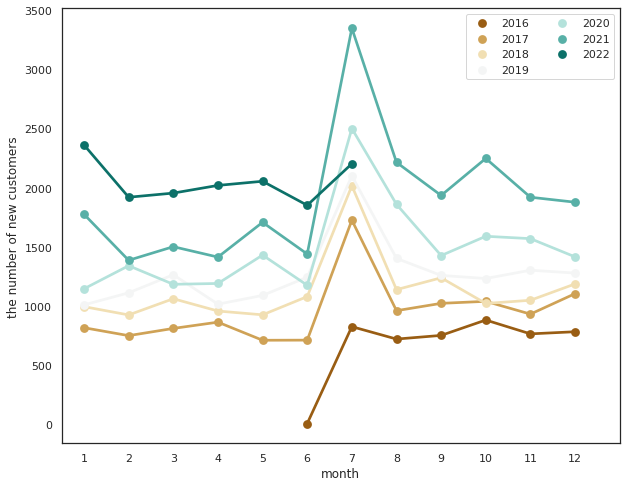

In [ ]:
plt.figure(figsize = (10,8))
# sns.lineplot(data=join, x='month', y='count', hue='year', palette='BrBG') 
sns.pointplot(data=join, x='month', y='count', hue='year', palette='BrBG')
plt.xticks(np.arange(0, 12+1))
plt.ylabel('the number of new customers')
plt.legend(ncol=2)
plt.show();

In [ ]:
join.groupby('year')['count'].sum()

year
2016     4729
2017    11440
2018    13587
2019    15303
2020    17821
2021    22760
2022    14360
Name: count, dtype: int64

- 연도별 신규가입자는 매년 증가하는 추세
- 월별로 살펴보면, 7월을 제외하고 월별로 유입정보는 비슷. 매년 7월에 가입자가 급증하는 것이 특징
- 7월에 프로모션이 집중되어있거나 다른 사회문화적 배경있는지 확인 필요
- 월별로 많이 판매되는 아이템도 연관지어 생각해보자

In [ ]:
join_pivot = join.pivot('month','year','count')
join_pivot.head()

year,2016,2017,2018,2019,2020,2021,2022
month,,,,,,,
1,NaN,816.0,994.0,1009.0,1145.0,1775.0,2361.0
2,NaN,749.0,924.0,1111.0,1340.0,1386.0,1919.0
3,NaN,810.0,1061.0,1264.0,1183.0,1501.0,1954.0
4,NaN,863.0,957.0,1015.0,1190.0,1413.0,2019.0
5,NaN,710.0,925.0,1089.0,1430.0,1707.0,2054.0


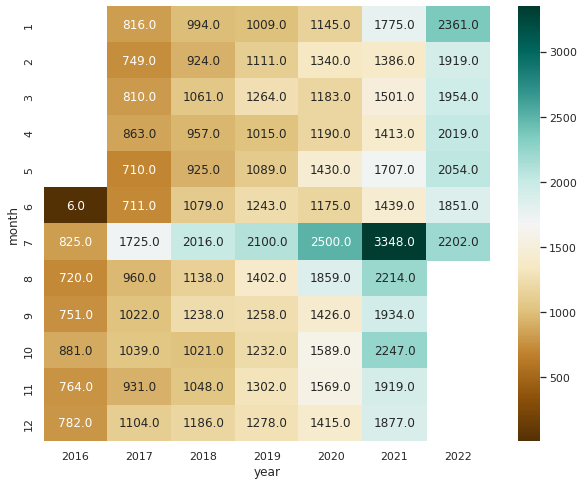

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(join_pivot, annot=True, fmt='.1f', cmap='BrBG')
plt.show();

##2.인구통계학적 특성

- 성비 : 남자 35.8%, 여자 64.2%
- device_type : iOS 23.4%, android 76.6%
- 연령대 : 20~30대 비중이 80%

In [ ]:
cst = pd.read_csv('./data/cst.csv')

In [ ]:
cst.head()

,customer_id,gender,birthdate,device_type,home_location,first_join_date,age
0,2870,2,1996-06-14,1,Sumatera Barat,2019-07-21,27
1,8193,2,1993-08-16,2,Jakarta Raya,2017-07-16,30
2,7279,1,1989-01-23,1,Nusa Tenggara Barat,2020-08-23,34
3,88813,1,1991-01-05,1,Kalimantan Timur,2021-10-03,32
4,82542,1,2000-07-15,1,Kalimantan Selatan,2021-04-11,23


In [ ]:
# 성비
cst['gender'].value_counts(normalize=True)

2    0.6423
1    0.3577
Name: gender, dtype: float64

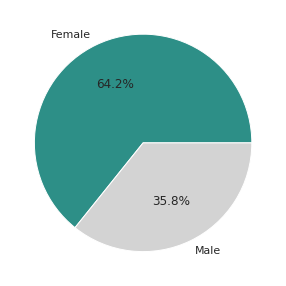

In [ ]:
plt.figure(figsize=(5,5))
ratio = cst['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['#2D8F87', 'lightgray']

plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors)
plt.show();

In [ ]:
# device 비율
cst['device_type'].value_counts(normalize=True)

2    0.76637
1    0.23363
Name: device_type, dtype: float64

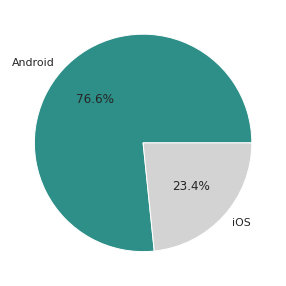

In [ ]:
plt.figure(figsize=(5,5))
ratio = cst['device_type'].value_counts()
labels = ['Android', 'iOS']
colors = ['#2D8F87', 'lightgray']

plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors)
plt.show();

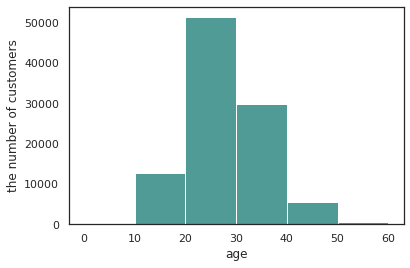

In [ ]:
# 연령대 분포
age = cst['age']//10*10
age.value_counts()

# 시각화
sns.histplot(x=age, bins=6)
plt.ylabel('the number of customers')
plt.xticks(range(0,70,10))
plt.show();

In [ ]:
age.value_counts(normalize=True)

2    0.51353
3    0.29864
1    0.12650
4    0.05547
5    0.00520
0    0.00036
6    0.00030
Name: age, dtype: float64

In [ ]:
cst.query('age<10')

,customer_id,gender,birthdate,device_type,home_location,first_join_date,age
1403,46274,1,2015-01-29,2,Jawa Timur,2021-04-16,8
2310,70369,1,2015-02-11,1,Jakarta Raya,2019-04-21,8
6194,49481,2,2014-01-03,2,Aceh,2021-02-07,9
6208,59954,1,2014-05-28,2,Lampung,2021-03-20,9
10669,90283,1,2014-06-20,2,Kalimantan Tengah,2017-03-18,9
14563,40554,2,2014-07-03,1,Jawa Tengah,2021-02-27,9
14618,16113,1,2014-03-21,1,Sulawesi Selatan,2021-01-24,9
16333,67572,1,2015-03-14,1,Jawa Timur,2022-06-25,8
16615,22754,1,2015-03-09,2,Lampung,2019-06-02,8
17262,8611,2,2016-01-15,1,Jakarta Raya,2020-07-12,7


##3.고객 segment를 위한 RFM 분석

In [ ]:
trs = pd.read_csv('./data/trs.csv')

In [ ]:
trs.head()

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity
0,2018-07-29T15:22:01.458193Z,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,189832,54728,1
1,2018-07-30T12:40:22.365620Z,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,145526,16193,1
2,2018-09-15T11:51:17.365620Z,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,540696,53686,4
3,2018-11-01T11:23:48.365620Z,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,271012,20228,1
4,2018-12-18T11:20:30.365620Z,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,198753,55220,1


In [ ]:
trs['payment_status'].value_counts()

Success    1201035
Failed       53550
Name: payment_status, dtype: int64

In [ ]:
# 결제 성공한 사람만 포함
trs['payment_status'] = trs['payment_status'].replace({'Success':1, 'Failed':0})
pay_s = trs.query('payment_status==1')[['customer_id','created_at','total_amount']]
pay_s.rename(columns={'created_at':'order_date'}, inplace=True)
pay_s['order_date'] = pd.to_datetime(pay_s['order_date'], format='%Y-%m-%d %H:%M')
pay_s.head()

,customer_id,order_date,total_amount
0,5868,2018-07-29 15:22:01.458193+00:00,189832
1,4774,2018-07-30 12:40:22.365620+00:00,145526
2,4774,2018-09-15 11:51:17.365620+00:00,540696
3,4774,2018-11-01 11:23:48.365620+00:00,271012
4,4774,2018-12-18 11:20:30.365620+00:00,198753


In [ ]:
pay_s['year'] = pay_s['order_date'].apply(lambda x:x.year)
pay_s['month'] = pay_s['order_date'].apply(lambda x:x.month)
pay_s.head()

,customer_id,order_date,total_amount,year,month
0,5868,2018-07-29 15:22:01.458193+00:00,189832,2018,7
1,4774,2018-07-30 12:40:22.365620+00:00,145526,2018,7
2,4774,2018-09-15 11:51:17.365620+00:00,540696,2018,9
3,4774,2018-11-01 11:23:48.365620+00:00,271012,2018,11
4,4774,2018-12-18 11:20:30.365620+00:00,198753,2018,12


In [ ]:
# 연도별 결제완료 건수
order_count = pay_s.groupby('year', as_index=False)['customer_id'].count()
order_count.columns = ['year','order_count']
order_count

,year,order_count
0,2016,6744
1,2017,47962
2,2018,103114
3,2019,164385
4,2020,244164
5,2021,361343
6,2022,273323


In [ ]:
# 연도별 월별 결제완료 건수
order_detail = pay_s.groupby(['year','month'], as_index=False)['customer_id'].count()
order_detail.columns=['year','month','order_count']
order_detail

,year,month,order_count
0,2016,6,1
1,2016,7,378
2,2016,8,781
3,2016,9,1024
4,2016,10,1440
...,...,...,...
69,2022,3,40367
70,2022,4,41346
71,2022,5,42386
72,2022,6,40263


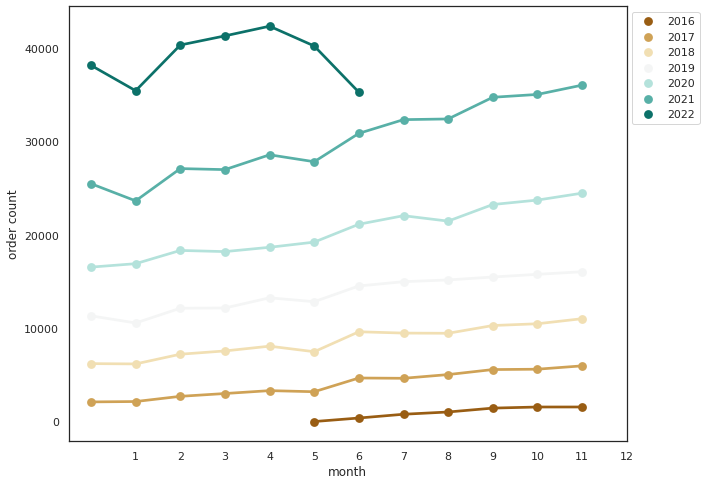

In [ ]:
plt.figure(figsize=(10,8))
sns.pointplot(data=order_detail, x='month', y='order_count', hue='year', palette='BrBG')
plt.xticks(np.arange(1, 12+1))
plt.ylabel('order count')
plt.legend(bbox_to_anchor=(1,1))
plt.show();

In [ ]:
# 연도별 실제 유저 수
actual_user = pay_s.groupby('year', as_index=False)['customer_id'].nunique()
actual_user.columns = ['year', 'user_count']
actual_user

,year,user_count
0,2016,2407
1,2017,8002
2,2018,13670
3,2019,20140
4,2020,27750
5,2021,36086
6,2022,32423


In [ ]:
# 연도별 주문금액
amount = pay_s.groupby('year', as_index=False)['total_amount'].sum()
amount

,year,total_amount
0,2016,8112602708
1,2017,55319205665
2,2018,122722534077
3,2019,189092017961
4,2020,289315443197
5,2021,426046418809
6,2022,319508328296


In [ ]:
avg_order = pd.merge(order_count, actual_user)
avg_order = pd.merge(avg_order, amount)
avg_order['avg_order_per_user'] = round(avg_order['order_count']/avg_order['user_count'],2)
avg_order['avg_amountr_per_user'] = round(avg_order['total_amount']/avg_order['user_count'],2)
avg_order

,year,order_count,user_count,total_amount,avg_order_per_user,avg_amountr_per_user
0,2016,6744,2407,8112602708,2.80,3370420.73
1,2017,47962,8002,55319205665,5.99,6913172.42
2,2018,103114,13670,122722534077,7.54,8977507.98
3,2019,164385,20140,189092017961,8.16,9388878.75
4,2020,244164,27750,289315443197,8.80,10425781.74
5,2021,361343,36086,426046418809,10.01,11806418.52
6,2022,273323,32423,319508328296,8.43,9854372.77


###3-1. recency

In [ ]:
# 이 데이터셋의 마지막 거래일자(결제 완료한 사람의 가장 마지막 거래일자)
print(pay_s['order_date'].max())

# 데이터셋의 마지막 날 구매한 사람을 고려하여 max_date는 22/8/1로 설정
import datetime
st_date = datetime.datetime(2022,8,1,0,0,0) # 기준날짜 생성
st_date = st_date.replace(tzinfo=datetime.timezone.utc) # 시간 연산 위해 타임존 통일
max_date = pd.to_datetime(st_date, format='%Y-%m-%d %H:%M')
max_date

2022-07-31 23:59:19.821469+00:00


Timestamp('2022-08-01 00:00:00+0000', tz='UTC')

In [ ]:
r = pay_s[['customer_id','order_date']]
r['datediff'] = max_date - r['order_date'] 
r.head() 

,customer_id,order_date,datediff
0,5868,2018-07-29 15:22:01.458193+00:00,1463 days 08:37:58.541807
1,4774,2018-07-30 12:40:22.365620+00:00,1462 days 11:19:37.634380
2,4774,2018-09-15 11:51:17.365620+00:00,1415 days 12:08:42.634380
3,4774,2018-11-01 11:23:48.365620+00:00,1368 days 12:36:11.634380
4,4774,2018-12-18 11:20:30.365620+00:00,1321 days 12:39:29.634380


In [ ]:
r.describe()

,customer_id,datediff
count,1.201035e+06,1201035
mean,4.982941e+04,654 days 06:05:38.470437136
std,2.899469e+04,504 days 01:46:57.284726304
min,3.000000e+00,0 days 00:00:40.178531
25%,2.457300e+04,235 days 02:38:01.996676
50%,4.960700e+04,535 days 10:32:20.207850
75%,7.496400e+04,985 days 05:27:40.917986
max,9.999900e+04,2222 days 00:41:15.207095


In [ ]:
# 고객별로 요약
r = r.groupby('customer_id', as_index=False)['datediff'].min()
r.head()

,customer_id,datediff
0,3,35 days 08:18:07.155506
1,8,77 days 01:13:37.343009
2,9,64 days 15:15:27.578966
3,11,146 days 09:30:46.240841
4,15,207 days 17:52:01.894960


In [ ]:
# 초 단위로 시간 변환
r['datediff'] = r['datediff'].apply(lambda x:x.total_seconds())
# r = r.set_index('customer_id')
r.head()

,customer_id,datediff
0,3,3.053887e+06
1,8,6.657217e+06
2,9,5.584528e+06
3,11,1.264865e+07
4,15,1.794912e+07


###3-2. frequency

In [ ]:
# 구매빈도 : 1년동안의 구매 건수를 기준으로 함
f = pay_s[['customer_id', 'order_date']]
f['year'] = f['order_date'].apply(lambda x:x.year)
f.head()

,customer_id,order_date,year
0,5868,2018-07-29 15:22:01.458193+00:00,2018
1,4774,2018-07-30 12:40:22.365620+00:00,2018
2,4774,2018-09-15 11:51:17.365620+00:00,2018
3,4774,2018-11-01 11:23:48.365620+00:00,2018
4,4774,2018-12-18 11:20:30.365620+00:00,2018


In [ ]:
f = f.groupby(['customer_id','year'], as_index=False).count()
f

,customer_id,year,order_date
0,3,2018,5
1,3,2019,15
2,3,2020,17
3,3,2021,21
4,3,2022,11
...,...,...,...
140473,99998,2019,2
140474,99998,2020,3
140475,99998,2021,2
140476,99998,2022,16


In [ ]:
f.describe()

,customer_id,year,order_date
count,140478.000000,140478.000000,140478.000000
mean,49758.761201,2020.141075,8.549631
std,28945.118156,1.574687,12.551385
min,3.000000,2016.000000,1.000000
25%,24689.000000,2019.000000,1.000000
50%,49621.500000,2020.000000,4.000000
75%,74729.000000,2021.000000,10.000000
max,99999.000000,2022.000000,263.000000


In [ ]:
# 고객의 연도별 주문건수
f = f.pivot('customer_id','year','order_date') # index, columns, values
f.fillna(0, inplace=True)
f = f.astype('int')
f.head()

year,2016,2017,2018,2019,2020,2021,2022
customer_id,,,,,,,
3,0,0,5,15,17,21,11
8,0,0,0,0,0,6,2
9,0,0,0,0,0,5,3
11,0,0,0,0,0,0,1
15,0,0,0,5,2,1,1


In [ ]:
f['recent'] = f[2021]+f[2022]
f.head()

year,2016,2017,2018,2019,2020,2021,2022,recent
customer_id,,,,,,,,
3,0,0,5,15,17,21,11,32
8,0,0,0,0,0,6,2,8
9,0,0,0,0,0,5,3,8
11,0,0,0,0,0,0,1,1
15,0,0,0,5,2,1,1,2


In [ ]:
f_recent=f.reset_index()
f_recent = f_recent[['customer_id','recent']]
f_recent.rename(columns={'recent':'frequency'}, inplace=True)
f_recent

year,customer_id,frequency
0,3,32
1,8,8
2,9,8
3,11,1
4,15,2
...,...,...
50237,99992,14
50238,99995,60
50239,99997,0
50240,99998,18


###3-3. monetary

In [ ]:
m = pay_s.copy()
m['year'] = m['order_date'].apply(lambda x:x.year)
m.head()

,customer_id,order_date,total_amount,year,month
0,5868,2018-07-29 15:22:01.458193+00:00,189832,2018,7
1,4774,2018-07-30 12:40:22.365620+00:00,145526,2018,7
2,4774,2018-09-15 11:51:17.365620+00:00,540696,2018,9
3,4774,2018-11-01 11:23:48.365620+00:00,271012,2018,11
4,4774,2018-12-18 11:20:30.365620+00:00,198753,2018,12


In [ ]:
m = m.groupby(['customer_id','year'], as_index=False).sum()
m.describe()

,customer_id,year,total_amount,month
count,140478.000000,140478.000000,1.404780e+05,140478.000000
mean,49758.761201,2020.141075,1.003799e+07,54.136698
std,28945.118156,1.574687,2.654559e+07,82.813544
min,3.000000,2016.000000,1.850100e+04,1.000000
25%,24689.000000,2019.000000,4.301938e+05,9.000000
50%,49621.500000,2020.000000,1.682938e+06,22.000000
75%,74729.000000,2021.000000,7.571589e+06,63.000000
max,99999.000000,2022.000000,9.411460e+08,1725.000000


In [ ]:
# 고객의 연도별 총 주문금액
m = m.pivot('customer_id','year','total_amount')
m.fillna(0, inplace=True)
m = m.astype('int')
m.head()

year,2016,2017,2018,2019,2020,2021,2022
customer_id,,,,,,,
3,0,0,1514452,8066581,6651663,20038575,8726312
8,0,0,0,0,0,3192281,1511320
9,0,0,0,0,0,3176995,891635
11,0,0,0,0,0,0,182533
15,0,0,0,5340470,836033,117423,63320


In [ ]:
m['recent'] = m[2021]+m[2022]
m.head()

year,2016,2017,2018,2019,2020,2021,2022,recent
customer_id,,,,,,,,
3,0,0,1514452,8066581,6651663,20038575,8726312,28764887
8,0,0,0,0,0,3192281,1511320,4703601
9,0,0,0,0,0,3176995,891635,4068630
11,0,0,0,0,0,0,182533,182533
15,0,0,0,5340470,836033,117423,63320,180743


In [ ]:
m_recent=m.reset_index()
m_recent = m_recent[['customer_id','recent']]
m_recent.rename(columns={'recent':'monetary'}, inplace=True)
m_recent

year,customer_id,monetary
0,3,28764887
1,8,4703601
2,9,4068630
3,11,182533
4,15,180743
...,...,...
50237,99992,13221430
50238,99995,33288121
50239,99997,0
50240,99998,68240484


###3-4. clustering


####3-4-1. scaling 할 경우


In [ ]:
rfm = pd.merge(r,f_recent, on='customer_id')
rfm = pd.merge(rfm,m_recent, on='customer_id')
rfm.rename(columns={'datediff':'recency'}, inplace=True)
rfm.set_index('customer_id', drop=True, inplace=True)
rfm

,recency,frequency,monetary
customer_id,,,
3,3.053887e+06,32,28764887
8,6.657217e+06,8,4703601
9,5.584528e+06,8,4068630
11,1.264865e+07,1,182533
15,1.794912e+07,2,180743
...,...,...,...
99992,5.840830e+06,14,13221430
99995,2.451422e+05,60,33288121
99997,7.147210e+07,0,0


In [ ]:
rfm.describe()

,recency,frequency,monetary
count,5.024200e+04,50242.00000,5.024200e+04
mean,2.593017e+07,12.63218,1.483927e+07
std,3.753388e+07,20.74702,3.634617e+07
min,4.017853e+01,0.00000,0.000000e+00
25%,3.443455e+06,1.00000,2.788515e+05
50%,9.674850e+06,4.00000,2.038649e+06
75%,3.124396e+07,15.00000,1.209976e+07
max,1.918996e+08,353.00000,8.840158e+08


- 2021년 1월~2022년 7월로 기간을 설정하니 주문건수와 주문량이 없는 고객 발견
- 이들은 이탈고객으로 볼 수 있을 듯!

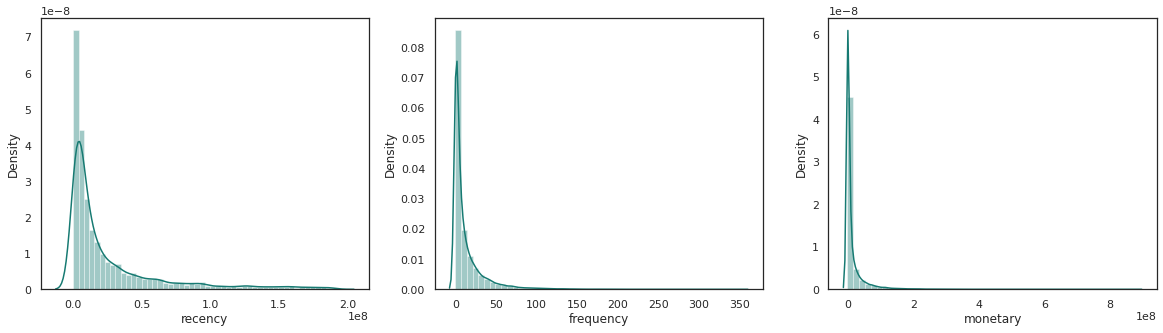

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.distplot(rfm['recency'])
plt.subplot(132)
sns.distplot(rfm['frequency']);
plt.subplot(133)
sns.distplot(rfm['monetary']);

- 데이터 편중 심함 → log transformation 적용

In [ ]:
# 값이 0인 데이터 삭제
zero_value = rfm.query('(recency == 0) or (frequency == 0) or (monetary == 0)') 
print(f'이탈이 예상되는 고객 수 : {len(zero_value)}명')
# 이탈이 예상되는 고객id
zero= zero_value.index.to_list()

이탈이 예상되는 고객 수 : 8225명


In [ ]:
# log 변환 위해 값이 0인 것 제거
rfm = rfm.drop(zero_value.index)

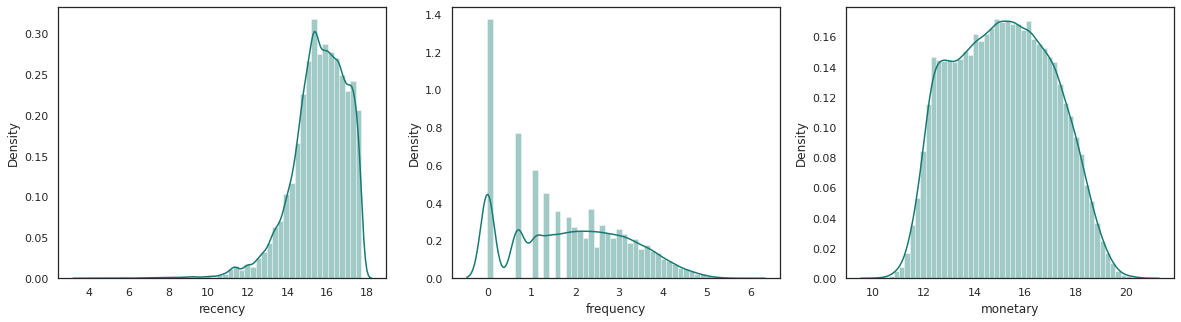

In [ ]:
r_log = np.log(rfm['recency'])
f_log = np.log(rfm['frequency'])
m_log = np.log(rfm['monetary'])

plt.figure(figsize=(20,5))
plt.subplot(131)
sns.distplot(r_log)
plt.subplot(132)
sns.distplot(f_log);
plt.subplot(133)
sns.distplot(m_log);

In [ ]:
log_rfm = pd.merge(r_log,f_log, on='customer_id')
log_rfm = pd.merge(log_rfm,m_log, on='customer_id')

In [ ]:
# scaling
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(log_rfm)

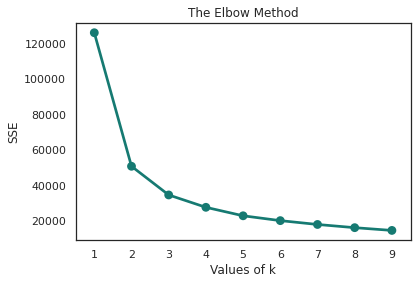

In [ ]:
from sklearn.cluster import KMeans

# 클러스터링 모델
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_

# 결과시각화
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
# 최종 모델 학습
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(rfm_scaled)

# 고객별 클러스터 지정
cluster_labels = kmeans.labels_

rfm_k3 = rfm.assign(Cluster = cluster_labels)
rfm_k3.head()

,recency,frequency,monetary,Cluster
customer_id,,,,
3,3.053887e+06,32,28764887,0
8,6.657217e+06,8,4703601,1
9,5.584528e+06,8,4068630,1
11,1.264865e+07,1,182533,2
15,1.794912e+07,2,180743,2


In [ ]:
# 클러스터링 결과 저장
seg = rfm_k3.reset_index()
seg = seg[['customer_id', 'Cluster']]

seg.head()

# seg.to_csv('seg.csv', index=False)

In [ ]:
rfm_k3.groupby(['Cluster']).agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean','count']
}).round(0)

recency frequency    monetary       
               mean      mean        mean  count
Cluster                                         
0         2223176.0      39.0  51741979.0  12088
1         8086175.0       8.0   6965365.0  15964
2        24106621.0       2.0    637495.0  13965

In [ ]:
cluster_0 = rfm_k3[rfm_k3.Cluster == 0]
cluster_1 = rfm_k3[rfm_k3.Cluster == 1]
cluster_2 = rfm_k3[rfm_k3.Cluster == 2]

In [ ]:
# recency의 seconds를 다시 days로 변경
rfm_k3.recency = rfm_k3.recency // (24 * 3600)

# 클러스터별 특징
cluster_avg = rfm_k3.groupby(['Cluster']).mean()

# monetary 달러 환산
cluster_avg.monetary = cluster_avg.monetary.apply(lambda x:int(x/14857.48)) 
cluster_avg

,recency,frequency,monetary
Cluster,,,
0,25.191016,39.401473,3482
1,93.071787,8.426647,468
2,278.520516,1.708414,42


**cluster 0 : 활성화 강함**
- 25일 전 구매, 1년 반동안 39회 구매, 지출규모도 $3458로 가장 큼

**cluste 1 : 전체 평균보다는 활성화 정도 떨어짐**
- 93일 전 구매, 1년 반동안 8회 구매, 지출 규모는 $462달러

**cluste 2 : 활성화 약함**
- 279일 전 구매, 1년 반동안 1.7회 구매, 지출 규모는 $42달러

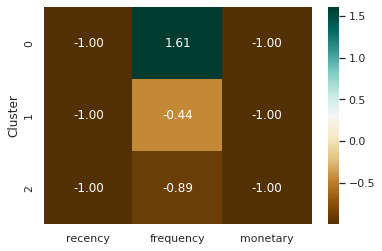

In [ ]:
population_avg = rfm.mean()
relative_imp = cluster_avg / population_avg -1
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='BrBG')

- 각 클러스터의 rmf가 전체 population에 얼만큼 차지하는가를 통해 중요도 확인 가능
- cluster0의 frequency 중요도 높음

In [ ]:
# cluser 1과 구매고객 평균 rfm과 비교해보자
rfm_all = rfm.copy()
rfm_all.recency = rfm_all.recency.apply(lambda x:x// (24 * 3600))
rfm_all.monetary = rfm_all.monetary.apply(lambda x:int(x/14857.48))
rfm_all.describe()

,recency,frequency,monetary
count,42017.000000,42017.000000,42017.000000
mean,135.179713,15.104981,1193.787086
std,139.847588,21.848307,2631.062627
min,0.000000,1.000000,1.000000
25%,32.000000,2.000000,51.000000
50%,79.000000,7.000000,245.000000
75%,194.000000,19.000000,1116.000000
max,576.000000,353.000000,59499.000000


In [ ]:
# 클러스터별 customer_id 모음
rfm_k3.head()
active = rfm_k3.query('Cluster==0').index.to_list()
normal = rfm_k3.query('Cluster==1').index.to_list()
non_active = rfm_k3.query('Cluster==2').index.to_list()

print(f'active 유저 수 : {len(active)}명')
print(f'normal 유저 수 : {len(normal)}명')
print(f'non_active 유저 수 : {len(non_active)}명')
print(f'이탈이 예상되는 유저 수 : {len(zero)}명')

active 유저 수 : 12088명
normal 유저 수 : 15964명
non_active 유저 수 : 13965명
이탈이 예상되는 유저 수 : 8225명


####3-4-2. scaling 안 할 경우

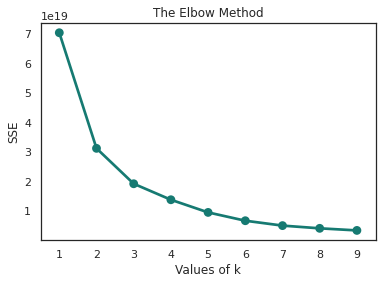

In [ ]:
# 클러스터링 모델
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm)
    sse[k] = kmeans.inertia_

# 결과시각화
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
# 최종 모델 학습
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(rfm)

# 고객별 클러스터 지정
cluster_labels = kmeans.labels_

rfm_k3_ns = rfm.assign(Cluster = cluster_labels)
rfm_k3_ns.head()

,recency,frequency,monetary,Cluster
customer_id,,,,
3,3.053887e+06,32,28764887,1
8,6.657217e+06,8,4703601,1
9,5.584528e+06,8,4068630,1
11,1.264865e+07,1,182533,1
15,1.794912e+07,2,180743,1


In [ ]:
rfm_k3_ns.groupby(['Cluster']).agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean','count']
}).round(0)

recency frequency     monetary       
               mean      mean         mean  count
Cluster                                          
0         3050067.0      51.0   74489968.0   4582
1        12963451.0       9.0    6801887.0  36790
2         2650613.0      91.0  238760130.0    645

In [ ]:
# recency의 seconds를 다시 days로 변경
rfm_k3_ns.recency = rfm_k3_ns.recency // (24 * 3600)

# 클러스터별 특징
cluster_avg_ns = rfm_k3_ns.groupby(['Cluster']).mean()

# monetary 달러 환산
cluster_avg_ns.monetary = cluster_avg_ns.monetary.apply(lambda x:int(x/14857.48)) 
cluster_avg_ns

,recency,frequency,monetary
Cluster,,,
0,34.757966,50.669795,5013
1,149.528404,9.342620,457
2,30.131783,91.134884,16070


- scaling 한 것이 유의미한 결과 →  scaling 한 내용을 활용하자

##4.코호트 분석

###4-1. 첫 구매일 기준 사용자 유지율 분석(클래식 리텐션)

- 월별 실 구매자 수 기준
- 구매빈도 기준(but detail page 본 것도 기준으로 할 수 있을 듯)

In [ ]:
pay_s.head()

,customer_id,order_date,total_amount
0,5868,2018-07-29 15:22:01.458193+00:00,189832
1,4774,2018-07-30 12:40:22.365620+00:00,145526
2,4774,2018-09-15 11:51:17.365620+00:00,540696
3,4774,2018-11-01 11:23:48.365620+00:00,271012
4,4774,2018-12-18 11:20:30.365620+00:00,198753


In [ ]:
pay_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201035 entries, 0 to 1254584
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   customer_id   1201035 non-null  int64              
 1   order_date    1201035 non-null  datetime64[ns, UTC]
 2   total_amount  1201035 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2)
memory usage: 36.7 MB


In [ ]:
df = pay_s[['customer_id', 'order_date']]
df['order_month'] = df['order_date'].dt.strftime('%Y-%m')
df.head()

,customer_id,order_date,order_month
0,5868,2018-07-29 15:22:01.458193+00:00,2018-07
1,4774,2018-07-30 12:40:22.365620+00:00,2018-07
2,4774,2018-09-15 11:51:17.365620+00:00,2018-09
3,4774,2018-11-01 11:23:48.365620+00:00,2018-11
4,4774,2018-12-18 11:20:30.365620+00:00,2018-12


In [ ]:
df.set_index('customer_id',inplace=True)
first_order = df.groupby(df.index)['order_date'].min()
first_order = first_order.dt.strftime('%Y-%m')
df['first_order'] = first_order
df.head()

,order_date,order_month,first_order
customer_id,,,
5868,2018-07-29 15:22:01.458193+00:00,2018-07,2018-07
4774,2018-07-30 12:40:22.365620+00:00,2018-07,2018-07
4774,2018-09-15 11:51:17.365620+00:00,2018-09,2018-07
4774,2018-11-01 11:23:48.365620+00:00,2018-11,2018-07
4774,2018-12-18 11:20:30.365620+00:00,2018-12,2018-07


In [ ]:
df.reset_index(inplace=True)
cohorts = df.groupby(['first_order', 'order_month'], as_index=False)['customer_id'].nunique()
cohorts.rename({'customer_id':'total_users'}, axis=1, inplace=True)
cohorts.head(20)

,first_order,order_month,total_users
0,2016-06,2016-06,1
1,2016-06,2017-09,1
2,2016-06,2018-12,1
3,2016-06,2020-02,1
4,2016-06,2021-05,1
5,2016-07,2016-07,268
6,2016-07,2016-08,43
7,2016-07,2016-09,60
8,2016-07,2016-10,57
9,2016-07,2016-11,72


In [ ]:
each_period = cohorts['first_order'].value_counts().sort_index()
each_period

2016-06     5
2016-07    73
2016-08    72
2016-09    71
2016-10    70
           ..
2022-03     5
2022-04     4
2022-05     3
2022-06     2
2022-07     1
Name: first_order, Length: 74, dtype: int64

In [ ]:
# 2016-06에서 수치가 이상하니 살펴보자
cohorts[cohorts['first_order']=='2016-06']

,first_order,order_month,total_users
0,2016-06,2016-06,1
1,2016-06,2017-09,1
2,2016-06,2018-12,1
3,2016-06,2020-02,1
4,2016-06,2021-05,1


In [ ]:
a = cohorts[cohorts['first_order']=='2016-07']
order_month = a['order_month'].to_list()
order_month.insert(0,'2016-06')
print(len(order_month))

74


In [ ]:
# first_order가 2016-06인 데이터셋 새로 만들어서 넣자
first_order = ['2016-06' for i in range(74)]
total_users = [0 for i in range(74)]
cols = ['first_order','order_month','total_users']

first1606 = pd.DataFrame({'first_order':first_order, 'order_month':order_month, 'total_users':total_users})
print(first1606.shape)
first1606.head()

(74, 3)


,first_order,order_month,total_users
0,2016-06,2016-06,0
1,2016-06,2016-07,0
2,2016-06,2016-08,0
3,2016-06,2016-09,0
4,2016-06,2016-10,0


In [ ]:
# 기존 값 채우기
lst = ['2016-06','2017-09','2018-12','2020-02','2021-05']
for i in range(first1606.shape[0]):
    for j in lst:
        if first1606.loc[i,'order_month'] == j:
            first1606.loc[i,'total_users'] = 1

In [ ]:
first1606.shape

(74, 3)

In [ ]:
first1606.tail()

,first_order,order_month,total_users
69,2016-06,2022-03,0
70,2016-06,2022-04,0
71,2016-06,2022-05,0
72,2016-06,2022-06,0
73,2016-06,2022-07,0


In [ ]:
# 기존의 first_order 2016-06의 값을 제거
del_row = cohorts[cohorts['first_order']=='2016-06']
cohorts.drop(del_row.index, axis=0, inplace=True)
cohorts.shape

(2701, 3)

In [ ]:
cohorts.reset_index(drop=True, inplace=True)
cohorts.head()

,first_order,order_month,total_users
0,2016-07,2016-07,268
1,2016-07,2016-08,43
2,2016-07,2016-09,60
3,2016-07,2016-10,57
4,2016-07,2016-11,72


In [ ]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
              
# 데이터프레임 합치기
cohorts = pd.concat([cohorts.iloc[:0], first1606, cohorts.iloc[0:]], ignore_index=True)
print(cohorts.shape)
cohorts.head(100)

(2775, 3)


,first_order,order_month,total_users
0,2016-06,2016-06,1
1,2016-06,2016-07,0
2,2016-06,2016-08,0
3,2016-06,2016-09,0
4,2016-06,2016-10,0
5,2016-06,2016-11,0
6,2016-06,2016-12,0
7,2016-06,2017-01,0
8,2016-06,2017-02,0
9,2016-06,2017-03,0


In [ ]:
# display 옵션 원래대로
pd.reset_option('^display.', silent=True)

In [ ]:
each_period = cohorts['first_order'].value_counts().sort_index()
each_period

2016-06    74
2016-07    73
2016-08    72
2016-09    71
2016-10    70
           ..
2022-03     5
2022-04     4
2022-05     3
2022-06     2
2022-07     1
Name: first_order, Length: 74, dtype: int64

In [ ]:
# 기간별 레이블 붙이기
cohortperiod = []
for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

cohorts['CohortPeriod']=cohortperiod

In [ ]:
cohorts.set_index(['first_order','CohortPeriod'],inplace=True)
cohorts.head()

order_month  total_users
first_order CohortPeriod                         
2016-06     0                2016-06            1
            1                2016-07            0
            2                2016-08            0
            3                2016-09            0
            4                2016-10            0

In [ ]:
cohorts = cohorts['total_users'].unstack(1)
cohorts

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
first_order,,,,,,,,,,,,,,,,,,,,,
2016-06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-07,268.0,43.0,60.0,57.0,72.0,63.0,73.0,67.0,66.0,72.0,...,69.0,66.0,75.0,63.0,65.0,63.0,54.0,51.0,22.0,NaN
2016-08,423.0,90.0,124.0,126.0,141.0,137.0,126.0,134.0,139.0,132.0,...,142.0,133.0,135.0,124.0,132.0,128.0,102.0,51.0,NaN,NaN
2016-09,435.0,81.0,112.0,108.0,125.0,126.0,124.0,118.0,128.0,127.0,...,114.0,126.0,126.0,116.0,125.0,97.0,39.0,NaN,NaN,NaN
2016-10,512.0,104.0,137.0,141.0,144.0,151.0,152.0,156.0,168.0,143.0,...,145.0,148.0,151.0,142.0,113.0,55.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03,873.0,464.0,574.0,496.0,393.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04,872.0,478.0,597.0,399.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05,408.0,209.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 비율로 변환
retention_matrix = cohorts.divide(cohorts[0], axis=0)
retention_matrix

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
first_order,,,,,,,,,,,,,,,,,,,,,
2016-06,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
2016-07,1.0,0.160448,0.223881,0.212687,0.268657,0.235075,0.272388,0.250000,0.246269,0.268657,...,0.257463,0.246269,0.279851,0.235075,0.242537,0.235075,0.201493,0.190299,0.08209,NaN
2016-08,1.0,0.212766,0.293144,0.297872,0.333333,0.323877,0.297872,0.316785,0.328605,0.312057,...,0.335697,0.314421,0.319149,0.293144,0.312057,0.302600,0.241135,0.120567,NaN,NaN
2016-09,1.0,0.186207,0.257471,0.248276,0.287356,0.289655,0.285057,0.271264,0.294253,0.291954,...,0.262069,0.289655,0.289655,0.266667,0.287356,0.222989,0.089655,NaN,NaN,NaN
2016-10,1.0,0.203125,0.267578,0.275391,0.281250,0.294922,0.296875,0.304688,0.328125,0.279297,...,0.283203,0.289062,0.294922,0.277344,0.220703,0.107422,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03,1.0,0.531501,0.657503,0.568156,0.450172,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04,1.0,0.548165,0.684633,0.457569,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05,1.0,0.512255,0.348039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


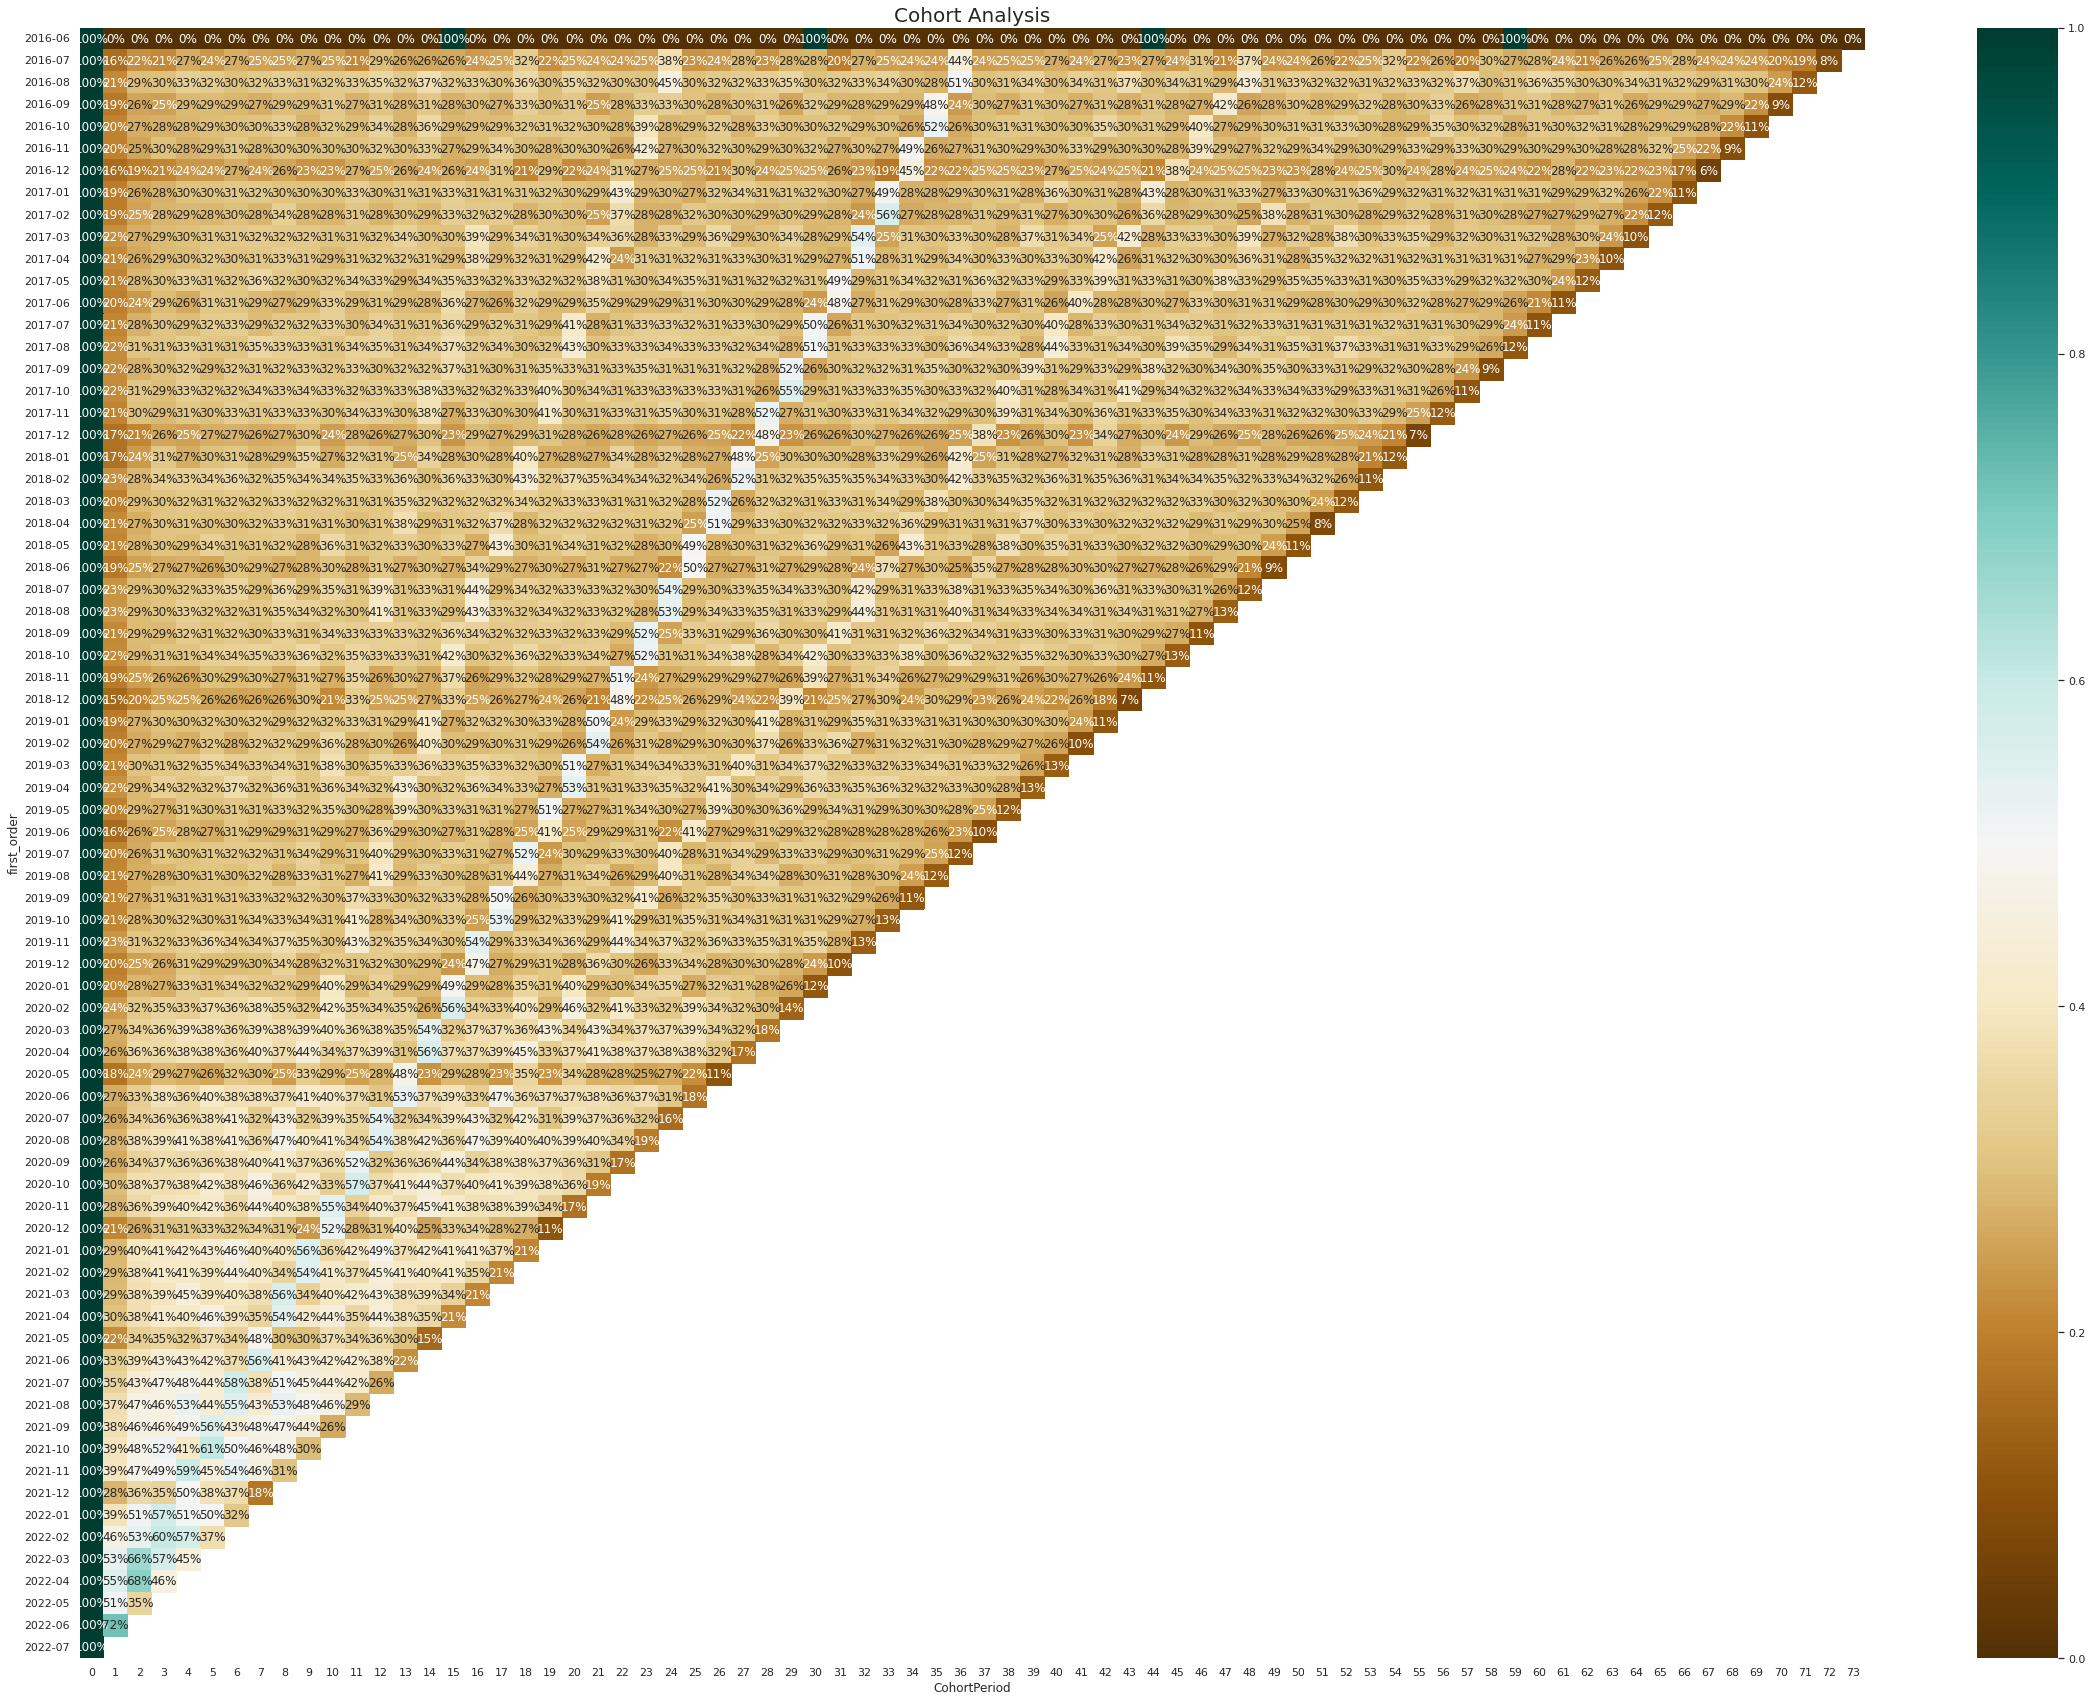

In [ ]:
# cohort chart
plt.figure(figsize=(40,30))
plt.title('Cohort Analysis', fontsize=20)
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='BrBG')
plt.show();

In [ ]:
len(retention_matrix)

74

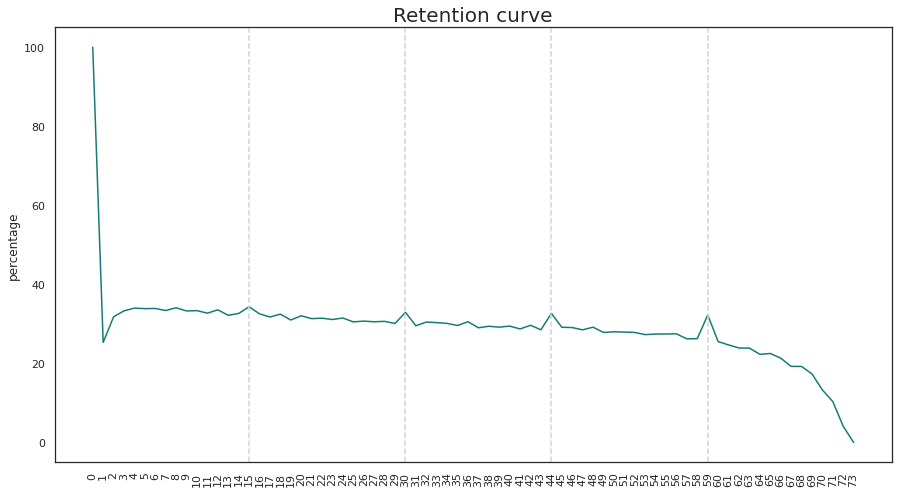

In [ ]:
# retention curve
retention_avg = retention_matrix.mean(axis=0) * 100

plt.figure(figsize=(15,8))
# sns.lineplot(data=retention_avg)
plt.plot(range(0, len(retention_avg)), retention_avg)
plt.title('Retention curve', fontsize=20)
plt.ylabel('percentage')
plt.xticks(np.arange(len(retention_matrix)), rotation=90)

plt.axvline(15, 0, 1, color='lightgray', linestyle='--')
plt.axvline(30, 0, 1, color='lightgray', linestyle='--')
plt.axvline(44, 0, 1, color='lightgray', linestyle='--')
plt.axvline(59, 0, 1, color='lightgray', linestyle='--')
plt.show()

최근 기간 한정(21/1~22/7)

In [ ]:
# retention maxtrix - 구매(p) 기반
rmp = retention_matrix.loc['2021-01':'2022-07', :19]

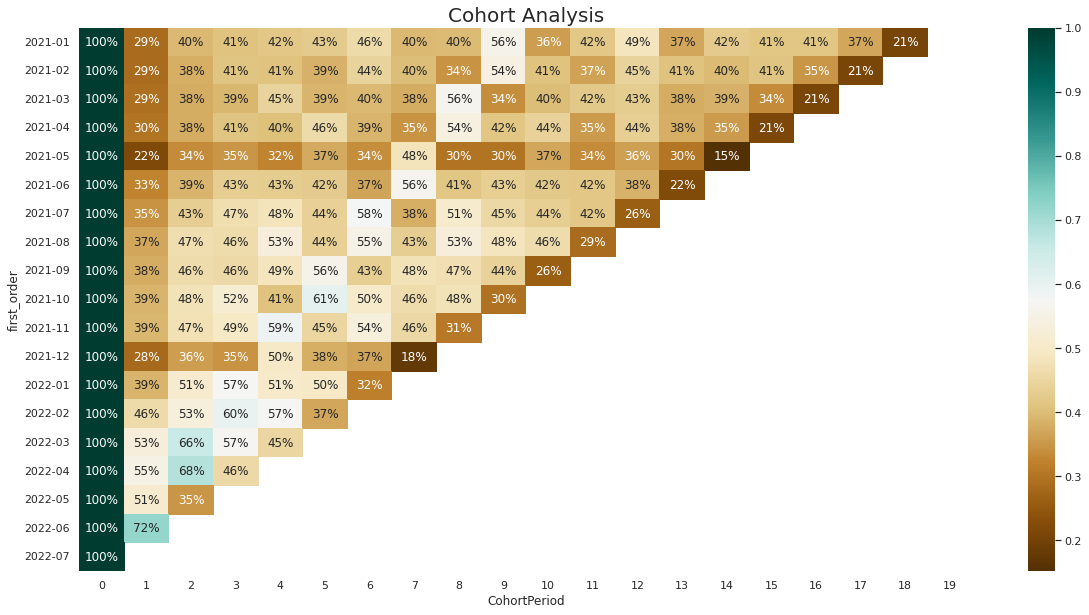

In [ ]:
# cohort chart
plt.figure(figsize=(20,10))
plt.title('Cohort Analysis', fontsize=20)
sns.heatmap(rmp, annot=True, fmt='.0%', cmap='BrBG')
plt.show();

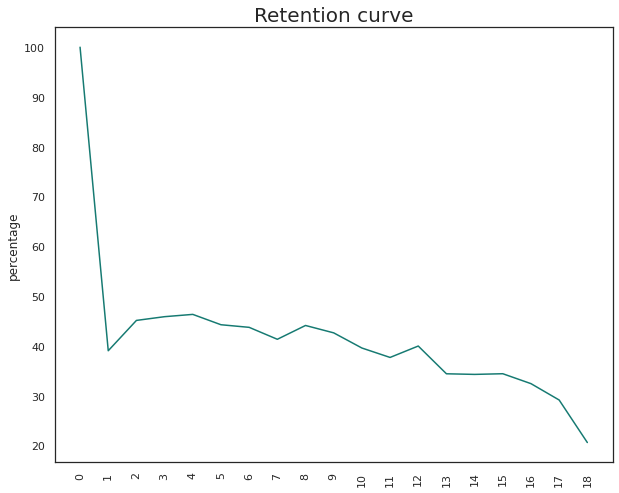

In [ ]:
# retention curve
rmp_avg = rmp.mean(axis=0) * 100

plt.figure(figsize=(10,8))
# sns.lineplot(data=rmp_avg)
plt.plot(range(0, len(rmp_avg)), rmp_avg)
plt.title('Retention curve', fontsize=20)
plt.ylabel('percentage')
plt.xticks(np.arange(len(rmp)), rotation=90)

# plt.axvline(15, 0, 1, color='lightgray', linestyle='--')
# plt.axvline(30, 0, 1, color='lightgray', linestyle='--')
# plt.axvline(44, 0, 1, color='lightgray', linestyle='--')
# plt.axvline(59, 0, 1, color='lightgray', linestyle='--')
plt.show()

###4-2. 유지기간 기준 유지율 분석(rolling retention)

- 이탈고객 수를 기준으로 산출하는 방식
- 유지기간을 기준으로 유지율 분석
- 유지기간은 구매여부와 상관없이 가입일~마지막 접속일(마지막 세션 발생일)로 설정



In [ ]:
# 대용량 파일 불러오기
import pyarrow.parquet as pq

clk = pq.read_pandas('./data/clk.parquet').to_pandas()
cst = pd.read_csv('./data/cst.csv')
trs = pd.read_csv('./data/trs.csv')

In [ ]:
# 결제 성공한 사람만 포함
trs['payment_status'] = trs['payment_status'].replace({'Success':1, 'Failed':0})
pay_s = trs.query('payment_status==1')[['customer_id','created_at','total_amount']]
pay_s.rename(columns={'created_at':'order_date'}, inplace=True)
pay_s['order_date'] = pd.to_datetime(pay_s['order_date'], format='%Y-%m-%d %H:%M')
pay_s.head()

,customer_id,order_date,total_amount
0,5868,2018-07-29 15:22:01.458193+00:00,189832
1,4774,2018-07-30 12:40:22.365620+00:00,145526
2,4774,2018-09-15 11:51:17.365620+00:00,540696
3,4774,2018-11-01 11:23:48.365620+00:00,271012
4,4774,2018-12-18 11:20:30.365620+00:00,198753


In [ ]:
all = cst.shape[0] # 가입회원(총 고객 수)
buy = pay_s['customer_id'].nunique() # 구매경험 있는 고객 수
buy/all # 고객들의 구매율

0.50242

- 가입된 고객 중 구매이력이 있는 고객은 50%

In [ ]:
# 구매경험 있는 고객
cst_buy = pay_s['customer_id'].unique()

In [ ]:
cst.head()

,customer_id,gender,birthdate,device_type,home_location,first_join_date,age
0,2870,2,1996-06-14,1,Sumatera Barat,2019-07-21,27
1,8193,2,1993-08-16,2,Jakarta Raya,2017-07-16,30
2,7279,1,1989-01-23,1,Nusa Tenggara Barat,2020-08-23,34
3,88813,1,1991-01-05,1,Kalimantan Timur,2021-10-03,32
4,82542,1,2000-07-15,1,Kalimantan Selatan,2021-04-11,23


In [ ]:
# 분석할 데이터프레임 생성
df = cst[['customer_id', 'first_join_date']]
df.rename(columns={'first_join_date':'join_date'}, inplace=True)
df['exp'] = df['customer_id'].apply(lambda x:1 if x in cst_buy else 0)
df.head()

,customer_id,join_date,exp
0,2870,2019-07-21,0
1,8193,2017-07-16,0
2,7279,2020-08-23,1
3,88813,2021-10-03,0
4,82542,2021-04-11,1


In [ ]:
last_date = clk.groupby('customer_id', as_index=False)['event_time'].max()
last_date['customer_id'] = last_date['customer_id'].astype('int')
last_date['event_time'] = last_date['event_time'].dt.strftime('%Y-%m-%d')
last_date.rename(columns={'event_time':'last_date'}, inplace=True)
last_date.head()

,customer_id,last_date
0,3,2022-06-26
1,8,2022-05-15
2,9,2022-05-28
3,11,2022-03-07
4,15,2022-01-05


In [ ]:
df = pd.merge(df, last_date, on='customer_id')
df.head()

,customer_id,join_date,exp,last_date
0,7279,2020-08-23,1,2022-07-29
1,82542,2021-04-11,1,2021-04-16
2,96453,2022-01-09,1,2022-04-22
3,8031,2019-09-12,1,2021-08-18
4,9152,2019-11-21,1,2021-09-07


In [ ]:
df['join_date'] = pd.to_datetime(df['join_date'], format='%Y-%m-%d')
df['last_date'] = pd.to_datetime(df['last_date'], format='%Y-%m-%d')
df['period'] = df['last_date'] - df['join_date']
df.head()

,customer_id,join_date,exp,last_date,period
0,7279,2020-08-23,1,2022-07-29,705 days
1,82542,2021-04-11,1,2021-04-16,5 days
2,96453,2022-01-09,1,2022-04-22,103 days
3,8031,2019-09-12,1,2021-08-18,706 days
4,9152,2019-11-21,1,2021-09-07,656 days


In [ ]:
df[['join_date','last_date']].describe()

,join_date,last_date
count,50704,50704
unique,2217,2064
top,2021-08-01 00:00:00,2022-07-31 00:00:00
freq,162,536
first,2016-06-30 00:00:00,2016-07-01 00:00:00
last,2022-07-31 00:00:00,2022-08-01 00:00:00


In [ ]:
df.period.describe()

count                          50704
mean     682 days 00:01:01.344272648
std      612 days 18:15:20.017865352
min                  0 days 00:00:00
25%                101 days 00:00:00
50%                559 days 00:00:00
75%               1133 days 00:00:00
max               2217 days 00:00:00
Name: period, dtype: object

- 평균 유지기간(가입일~마지막 접속일) 682일

In [ ]:
df['join_date'] = df['join_date'].dt.strftime('%Y-%m') # str로 변환
df['last_date'] = df['last_date'].dt.strftime('%Y-%m') # str로 변환
df['period'] = df['period'].dt.days # timedelta를 int로 변환

# 최근 가입자를 대상으로 분석
df = df[df['join_date']>='2021-01']

# 유지개월수 계산
df['monthdiff'] = df['period'] // 30
df.drop(columns='period', inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()     

,customer_id,join_date,exp,last_date,monthdiff
0,82542,2021-04,1,2021-04,0
1,96453,2022-01,1,2022-04,3
2,73093,2021-07,1,2022-01,6
3,72106,2021-05,1,2022-06,13
4,6487,2021-02,1,2022-02,11


In [ ]:
# 초기 인원
start = df.groupby('join_date')['customer_id'].count()
# start.rename(columns={'customer_id':'count'}, inplace=True)
start.head()

join_date
2021-01    942
2021-02    765
2021-03    830
2021-04    743
2021-05    470
Name: customer_id, dtype: int64

In [ ]:
start['count'].sum()

16694

####이탈고객 수

In [ ]:
# 월별 이탈 인원
churn = df.groupby(['join_date', 'monthdiff'], as_index=False)['customer_id'].count()
churn.rename(columns={'customer_id':'count'}, inplace=True)
churn.head()

,join_date,monthdiff,count
0,2021-01,0,180
1,2021-01,9,104
2,2021-01,12,72
3,2021-01,13,21
4,2021-01,14,61


- 21년 1월에 가입에서 마지막 접속일이 1개월 이내인 사람이 180명(이후 접속 안함) = 21년 1월에 가입해서 당월에 이탈한 인원이 180명

In [ ]:
# retention matrix에 사용할 인덱스
join_date = df['join_date'].unique()
join_date = list(join_date)
join_date.sort()
print(join_date)

['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07']


- 월초 유지인원 : 당월 가입자 또는 전월로부터 넘어온 유지인원
- 이탈인원 : 접속일자가 당월이 마지막인 고객 수
- 월말 유지인원 = 월초 유지인원 - 이탈인원

In [ ]:
# 이탈인원 매트릭스

# 빈 데이터프레임 생성
mt_churn = pd.DataFrame(index=join_date, columns=range(0,20))

# 월별 이탈인원 채우기
for j, d, c in zip(churn['join_date'], churn['monthdiff'], churn['count']):
    if d==0 :
        mt_churn.loc[j,d] = c
    else:
        mt_churn.loc[j,d-1] = c

# 결측치는 0으로 대체(결측치는 이탈인원 없음을 의미)
mt_churn.fillna(0, inplace=True)

# # 값이 없어야할 곳에 0이 채워진 경우 다시 np.nan으로 대체
idx = mt_churn.index.to_list()
cols = mt_churn.columns.to_list()

for i in range(len(idx)):
    mt_churn.iloc[i:i+1,-(i+1):] = np.nan

mt_churn.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2021-01,180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,0.0,0.0,72.0,21.0,61.0,66.0,105.0,185.0,140.0,8.0,NaN
2021-02,165,0.0,0.0,0.0,0.0,0.0,0.0,54.0,30.0,0.0,40.0,15.0,54.0,68.0,93.0,139.0,103.0,4.0,NaN,NaN
2021-03,186,0.0,0.0,0.0,0.0,0.0,0.0,89.0,0.0,12.0,43.0,74.0,55.0,87.0,154.0,127.0,3.0,NaN,NaN,NaN
2021-04,162,0.0,0.0,0.0,0.0,0.0,65.0,22.0,0.0,62.0,30.0,53.0,90.0,141.0,113.0,5.0,NaN,NaN,NaN,NaN
2021-05,146,0.0,0.0,0.0,0.0,0.0,63.0,0.0,13.0,30.0,35.0,67.0,72.0,43.0,1.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 당월 초기(=전월 말기) 유지인원 매트릭스

# 빈 데이터프레임 생성
mt_start = pd.DataFrame(index=join_date, columns=range(0,20))
mt_start[0] = start # 월별 초기 가입자 수

# 계산 값 채우기
mt_start.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2021-01,942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03,830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04,743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05,470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 당월 말기 유지인원 매트릭스
# 당월 말 유지인원 = 당월 초 유지인원 - 이탈인원

# 빈 데이터프레임 생성
mt_end = pd.DataFrame(index=join_date, columns=range(0,20))

# 초기 값 계산
for idx in mt_end.index:
    mt_end.loc[idx,0] = mt_start.loc[idx,0]-mt_churn.loc[idx,0]
mt_end.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2021-01,762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05,324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# mt_start, mt_end 값 채우기

idx = mt_end.index.to_list()
cols = mt_end.columns.to_list()
cols.pop(0) # 초기 값은 채워져 있으므로 제외

for i in idx :
    for c in cols:
        if c == 1:
            mt_start.loc[i,c] = mt_end.loc[i,0]
            mt_end.loc[i,c] = mt_start.loc[i,c] - mt_churn.loc[i,c]
        else:
            mt_start.loc[i,c] = mt_end.loc[i,c-1]
            mt_end.loc[i,c] = mt_start.loc[i,c] - mt_churn.loc[i,c]

In [ ]:
mt_start.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2021-01,942,762,762.0,762.0,762.0,762.0,762.0,762.0,762.0,658.0,658.0,658.0,586.0,565.0,504.0,438.0,333.0,148.0,8.0,0.0
2021-02,765,600,600.0,600.0,600.0,600.0,600.0,600.0,546.0,516.0,516.0,476.0,461.0,407.0,339.0,246.0,107.0,4.0,0.0,NaN
2021-03,830,644,644.0,644.0,644.0,644.0,644.0,644.0,555.0,555.0,543.0,500.0,426.0,371.0,284.0,130.0,3.0,0.0,NaN,NaN
2021-04,743,581,581.0,581.0,581.0,581.0,581.0,516.0,494.0,494.0,432.0,402.0,349.0,259.0,118.0,5.0,0.0,NaN,NaN,NaN
2021-05,470,324,324.0,324.0,324.0,324.0,324.0,261.0,261.0,248.0,218.0,183.0,116.0,44.0,1.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
mt_end.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2022-03,631,496.0,254.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04,781,535.0,265.0,260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05,224,164.0,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06,372,372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 분석결과 + 시각화

In [ ]:
# 월별 유지율 = 월말 유지인원 / 월초 유지인원

# 빈 데이터프레임 생성
monthly_rt = pd.DataFrame(0, index=join_date, columns=range(0,20))

idx = mt_end.index.to_list()
cols = mt_end.columns.to_list()

for i in idx :
    for c in cols:
        monthly_rt.loc[i,c] = mt_end.loc[i,c] / mt_start.loc[i,c]

monthly_rt.head()        

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2021-01,0.808917,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.863517,1.000000,1.000000,0.890578,0.964164,0.892035,0.869048,0.760274,0.444444,0.054054,0.0,NaN
2021-02,0.784314,1.0,1.0,1.0,1.0,1.0,1.000000,0.910000,0.945055,1.000000,0.922481,0.968487,0.882863,0.832924,0.725664,0.434959,0.037383,0.000000,NaN,NaN
2021-03,0.775904,1.0,1.0,1.0,1.0,1.0,1.000000,0.861801,1.000000,0.978378,0.920810,0.852000,0.870892,0.765499,0.457746,0.023077,0.000000,NaN,NaN,NaN
2021-04,0.781965,1.0,1.0,1.0,1.0,1.0,0.888124,0.957364,1.000000,0.874494,0.930556,0.868159,0.742120,0.455598,0.042373,0.000000,NaN,NaN,NaN,NaN
2021-05,0.689362,1.0,1.0,1.0,1.0,1.0,0.805556,1.000000,0.950192,0.879032,0.839450,0.633880,0.379310,0.022727,0.000000,NaN,NaN,NaN,NaN,NaN


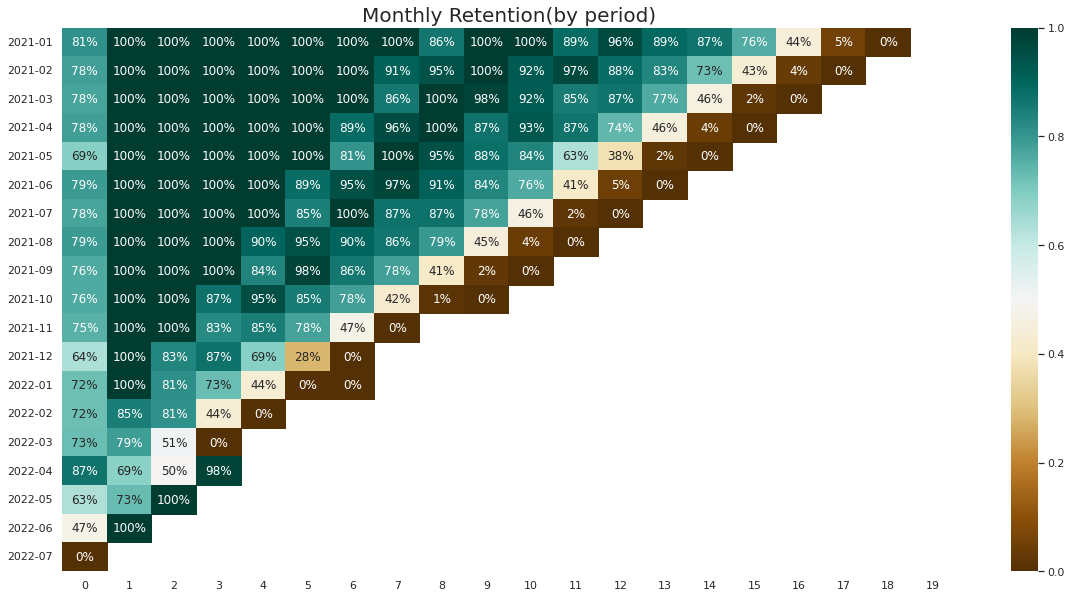

In [ ]:
# 시각화
plt.figure(figsize=(20,10))
plt.title('Monthly Retention(by period)', fontsize=20)
sns.heatmap(monthly_rt, annot=True, fmt='.0%', cmap='BrBG')
plt.show();

In [ ]:
# 월별 이탈률

churn_rate = monthly_rt.copy()
churn_rate = 1 - monthly_rt.copy()
churn_rate

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2021-01,0.191083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.136483,0.000000,0.000000,0.109422,0.035836,0.107965,0.130952,0.239726,0.555556,0.945946,1.0,NaN
2021-02,0.215686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.054945,0.000000,0.077519,0.031513,0.117137,0.167076,0.274336,0.565041,0.962617,1.000000,NaN,NaN
2021-03,0.224096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.138199,0.000000,0.021622,0.079190,0.148000,0.129108,0.234501,0.542254,0.976923,1.000000,NaN,NaN,NaN
2021-04,0.218035,0.000000,0.000000,0.000000,0.000000,0.000000,0.111876,0.042636,0.000000,0.125506,0.069444,0.131841,0.257880,0.544402,0.957627,1.000000,NaN,NaN,NaN,NaN
2021-05,0.310638,0.000000,0.000000,0.000000,0.000000,0.000000,0.194444,0.000000,0.049808,0.120968,0.160550,0.366120,0.620690,0.977273,1.000000,NaN,NaN,NaN,NaN,NaN
2021-06,0.207792,0.000000,0.000000,0.000000,0.000000,0.114754,0.050000,0.027290,0.088176,0.164835,0.236842,0.586207,0.950000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2021-07,0.223214,0.000000,0.000000,0.000000,0.000000,0.153257,0.000905,0.126812,0.125519,0.219454,0.537994,0.980263,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,0.210526,0.000000,0.000000,0.000000,0.098305,0.051378,0.097754,0.136164,0.206780,0.551282,0.957143,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09,0.237996,0.000000,0.000000,0.000000,0.163014,0.021277,0.140468,0.217899,0.587065,0.975904,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10,0.237333,0.000000,0.000000,0.128205,0.045455,0.147059,0.218391,0.577731,0.985075,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


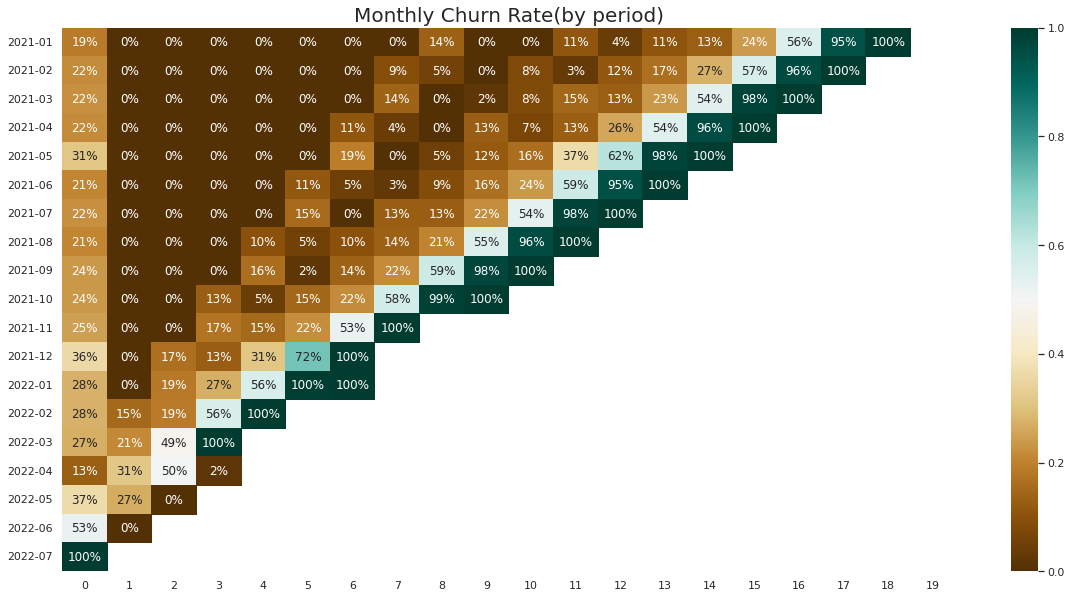

In [ ]:
# 시각화
plt.figure(figsize=(20,10))
plt.title('Monthly Churn Rate(by period)', fontsize=20)
sns.heatmap(churn_rt, annot=True, fmt='.0%', cmap='BrBG')
plt.show();

In [ ]:
# 총인원 대비 유지율 = 월별 월말 유지인원 / 초기 가입자 수

# 빈 데이터프레임 생성
start_rt = pd.DataFrame(0, index=join_date, columns=range(0,20))

idx = mt_end.index.to_list()
cols = mt_end.columns.to_list()

for i in idx :
    for c in cols:
        start_rt.loc[i,c] = mt_end.loc[i,c] / start[i]

start_rt.head()  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2021-01,0.808917,0.808917,0.808917,0.808917,0.808917,0.808917,0.808917,0.808917,0.698514,0.698514,0.698514,0.622081,0.599788,0.535032,0.464968,0.353503,0.157113,0.008493,0.0,NaN
2021-02,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.713725,0.674510,0.674510,0.622222,0.602614,0.532026,0.443137,0.321569,0.139869,0.005229,0.000000,NaN,NaN
2021-03,0.775904,0.775904,0.775904,0.775904,0.775904,0.775904,0.775904,0.668675,0.668675,0.654217,0.602410,0.513253,0.446988,0.342169,0.156627,0.003614,0.000000,NaN,NaN,NaN
2021-04,0.781965,0.781965,0.781965,0.781965,0.781965,0.781965,0.694482,0.664872,0.664872,0.581427,0.541050,0.469717,0.348587,0.158816,0.006729,0.000000,NaN,NaN,NaN,NaN
2021-05,0.689362,0.689362,0.689362,0.689362,0.689362,0.689362,0.555319,0.555319,0.527660,0.463830,0.389362,0.246809,0.093617,0.002128,0.000000,NaN,NaN,NaN,NaN,NaN


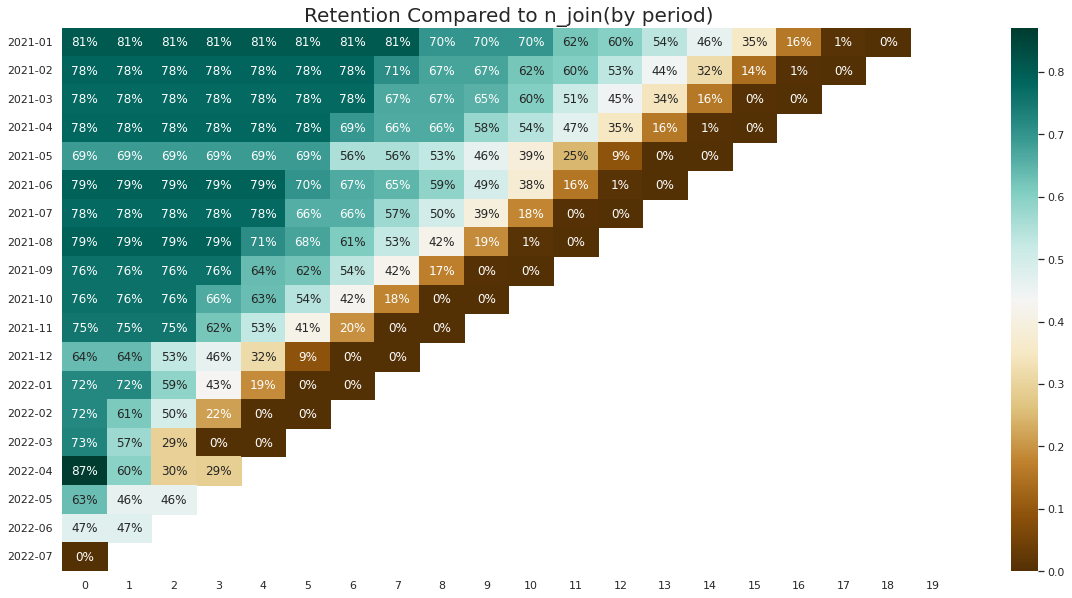

In [ ]:
# 시각화
plt.figure(figsize=(20,10))
plt.title('Retention Compared to n_join(by period)', fontsize=20)
sns.heatmap(start_rt, annot=True, fmt='.0%', cmap='BrBG')
plt.show();

- 2021월부터 유지율이 이전 기간들에 비해 빠르게 감소하는 추세

##5.프로모션 분석

In [ ]:
# 대용량 파일 불러오기
import pyarrow.parquet as pq

clk = pq.read_pandas('./data/clk.parquet').to_pandas()
clk.head()

In [ ]:
clk[clk['promo_amount'].notnull()].head()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id
18,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_PROMO,2019-09-09 07:22:05.425431+00:00,28329764-aa29-4e7a-9d8e-eee88d00a640,MOBILE,NaN,NaN,NaN,,,AZ2022,7047.0,18770.0
44,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,ADD_PROMO,2019-09-24 16:16:10.425431+00:00,7a808081-2384-4a3a-ad00-9f10df4f07a7,WEB,NaN,NaN,NaN,,,BUYMORE,4903.0,18770.0
51,98e66f53-f24f-4238-8c9c-34a0482e22d5,ADD_PROMO,2019-10-02 15:14:18.425431+00:00,1d293181-b1cf-46e0-b5eb-682fe652131d,MOBILE,NaN,NaN,NaN,,,AZ2022,6307.0,18770.0
72,1553b735-081d-4dc5-8d5f-80c1bf442e0f,ADD_PROMO,2019-10-16 20:20:14.425431+00:00,c86b2a91-0a21-404a-98e9-947d3060fdc2,MOBILE,NaN,NaN,NaN,,,WEEKENDSERU,5165.0,18770.0
167,a1027501-f085-479f-a719-1aeec041408c,ADD_PROMO,2019-11-20 03:28:12.425431+00:00,cef2a298-e38b-4460-bc89-71f7a3039ff7,MOBILE,NaN,NaN,NaN,,,XX2022,2569.0,18770.0


- product_id가 add_to_cart 이벤트에만 값이 있어서 제품의 카테고리별로 어떤 프로모션이 적용되는지는 확인 불가
- 퍼널분석에서도 session_id로 추적한 것이 아니었기 때문에 해당 구매일에 본 제품을 곧 구매했다고 단정짓기도 어려움
- 구매시도로 연결된 데이터를 기준으로 프로모션 관련 분석 진행

In [ ]:
trs = pd.read_csv('./data/trs.csv')
trs.head()

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity
0,2018-07-29T15:22:01.458193Z,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,189832,54728,1
1,2018-07-30T12:40:22.365620Z,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,145526,16193,1
2,2018-09-15T11:51:17.365620Z,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,540696,53686,4
3,2018-11-01T11:23:48.365620Z,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,271012,20228,1
4,2018-12-18T11:20:30.365620Z,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,198753,55220,1


In [ ]:
# 프로모션이 적용된 거래시도 건수 중 필요 컬럼만 선택
prm = trs[trs['promo_code'].notnull()]
prm = prm[['customer_id','created_at','promo_code','promo_amount','total_amount']]
prm.head()

,customer_id,created_at,promo_code,promo_amount,total_amount
0,5868,2018-07-29T15:22:01.458193Z,WEEKENDSERU,1415,189832
5,4774,2019-02-03T11:25:55.365620Z,WEEKENDMANTAP,6369,176865
8,4774,2019-06-24T12:08:52.365620Z,AZ2022,4019,360757
9,4774,2019-08-10T12:14:24.365620Z,WEEKENDSERU,9072,1285740
10,4774,2019-08-10T12:14:24.365620Z,WEEKENDSERU,9072,1285740


In [ ]:
# prm.rename(columns={'created_at':'date'}, inplace=True)
prm['created_at'] = pd.to_datetime(prm['created_at'])
prm['date'] = prm['created_at'].dt.strftime('%Y-%m')
prm.drop(columns='created_at', inplace=True)
prm['discount_rate'] = prm['promo_amount'] / prm['total_amount']
prm.head()

,customer_id,promo_code,promo_amount,total_amount,date,discount_rate
0,5868,WEEKENDSERU,1415,189832,2018-07,0.007454
5,4774,WEEKENDMANTAP,6369,176865,2019-02,0.036011
8,4774,AZ2022,4019,360757,2019-06,0.011140
9,4774,WEEKENDSERU,9072,1285740,2019-08,0.007056
10,4774,WEEKENDSERU,9072,1285740,2019-08,0.007056


In [ ]:
# 2021년 1월~2022년 7월까지 기간에 대해서만 분석(최근 동향 파악)
prm['date'] = pd.to_datetime(prm['date'], format='%Y-%m')

start_date = pd.Timestamp('2021-01')
end_date = pd.Timestamp('2022-08')
prm_r = prm[(prm['date'] >= start_date) & (prm['date'] < end_date)]

###5-1. 프로모션 종류별 할인율

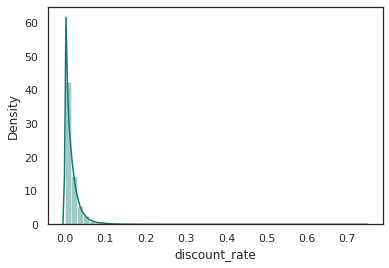

In [ ]:
sns.distplot(prm_r['discount_rate'])
plt.show();

In [ ]:
prm_r['discount_rate'].describe()

count    227107.000000
mean          0.016211
std           0.020742
min           0.000081
25%           0.003387
50%           0.009764
75%           0.021382
max           0.743925
Name: discount_rate, dtype: float64

In [ ]:
prm_r.query('discount_rate > 0.5')

,customer_id,promo_code,promo_amount,total_amount,date,discount_rate
26027,54708,BUYMORE,7164,9630,2021-12-01,0.743925
139273,82127,BUYMORE,9363,15063,2021-10-01,0.621589
416235,75096,XX2022,6478,8754,2021-02-01,0.740005
531167,71233,SC2022,14941,28942,2021-02-01,0.516239
1054219,77028,AZ2022,9363,15063,2021-12-01,0.621589
1232318,32137,STARTUP,10147,19220,2022-04-01,0.527940
1254260,97130,XX2022,8158,13893,2021-08-01,0.587202


- 평균 할인율은 1.6%
- 할인율이 50% 이상이 경우는 7건. 시기별 특징은 없음. 제품의 출시일을 알 수 있다면 이월상품에 대한 프로모션이라 할인율이 큰지 확인할 수 있을 듯

In [ ]:
prm_r.groupby('promo_code').agg({'discount_rate':['mean','min','max']})

discount_rate                    
                       mean       min       max
promo_code                                     
AZ2022             0.015131  0.000175  0.621589
BUYMORE            0.015106  0.000081  0.743925
LIBURDONG          0.014824  0.000190  0.250606
SC2022             0.030696  0.000325  0.516239
STARTUP            0.030985  0.000432  0.527940
WEEKENDMANTAP      0.015165  0.000202  0.405318
WEEKENDSERU        0.015112  0.000186  0.436469
XX2022             0.015150  0.000203  0.740005

- 평균 할인율이 가장 높은 프로모션은 SC2022, STARTUP

In [ ]:
prm_r['promo_code'].value_counts(normalize=True)

AZ2022           0.272546
BUYMORE          0.206784
WEEKENDSERU      0.186630
XX2022           0.138529
LIBURDONG        0.063939
WEEKENDMANTAP    0.061284
SC2022           0.035503
STARTUP          0.034785
Name: promo_code, dtype: float64

###5-2. 프모로션 종류별 이용추이

In [ ]:
prm_r = prm_r.groupby(['date','promo_code'], as_index=False)['customer_id'].count()
prm_r.set_index(['date','promo_code'], inplace=True)
prm_r = prm_r['customer_id'].unstack(1)
prm_r.fillna(0, inplace=True)
prm_r

promo_code,AZ2022,BUYMORE,LIBURDONG,SC2022,STARTUP,WEEKENDMANTAP,WEEKENDSERU,XX2022
date,,,,,,,,
2021-01-01,2578,1918,722,418,270,665,2131,1319
2021-02-01,2609,1908,627,330,315,630,1904,1318
2021-03-01,2888,2279,569,342,431,544,1786,1554
2021-04-01,3003,2244,670,389,405,577,1864,1532
2021-05-01,2952,2210,814,342,380,691,2350,1483
2021-06-01,3015,2284,618,384,341,605,1733,1500
2021-07-01,3174,2246,832,387,401,815,2312,1527
2021-08-01,3165,2459,719,383,393,788,2368,1640
2021-09-01,3434,2342,640,439,411,662,2034,1811


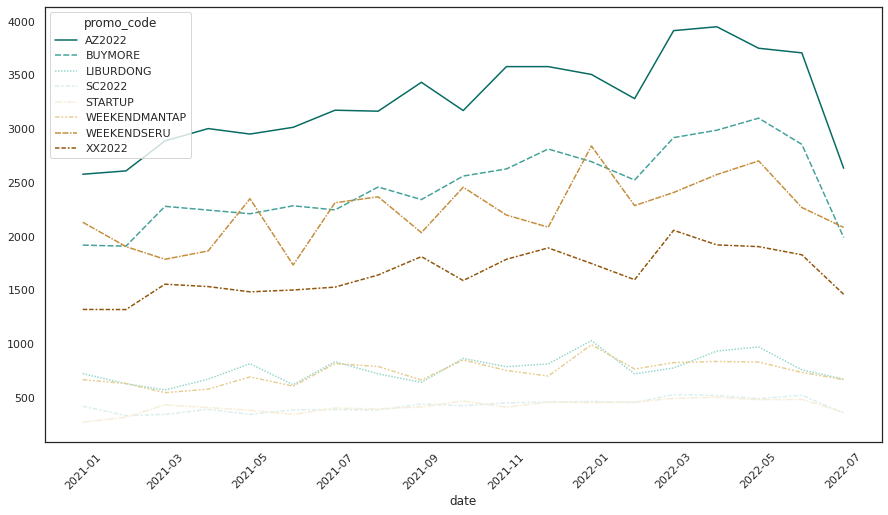

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=prm_r, palette='BrBG_r')
plt.xticks(rotation=45)
plt.show();

- AZ2022 > BUYMORE > WEEKENDSERU 순으로 적용 많이 됨
- 그 외 인사이트라 할만한 것은 없음

In [ ]:
b = prm_r.reset_index()
b.isnull().sum()

promo_code
date             0
AZ2022           0
BUYMORE          0
LIBURDONG        0
SC2022           0
STARTUP          0
WEEKENDMANTAP    0
WEEKENDSERU      0
XX2022           0
dtype: int64

- 매월 모든 종류의 프로모션이 적용된 내역이 있음 → 주말, 공휴일 프로모션을 제외한 모든 프로모션은 특정 시기에만 진행되지 않고 항상 진행됨

##6.제품 카테고리 분석

결제 성공여부와 상관없이 구매를 시도한 모든 건수에 대해 분석

In [ ]:
# 대용량 파일 불러오기
import pyarrow.parquet as pq

clk = pq.read_pandas('./data/clk.parquet').to_pandas()
cst = pd.read_csv('./data/cst.csv')
trs = pd.read_csv('./data/trs.csv')
prd = pd.read_csv('./data/prd.csv')
seg = pd.read_csv('./data/seg.csv')

In [ ]:
trs.head()

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity
0,2018-07-29T15:22:01.458193Z,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,1,1415,WEEKENDSERU,10000,189832,54728,1
1,2018-07-30T12:40:22.365620Z,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,1,0,NaN,10000,145526,16193,1
2,2018-09-15T11:51:17.365620Z,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,1,0,NaN,10000,540696,53686,4
3,2018-11-01T11:23:48.365620Z,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,1,0,NaN,0,271012,20228,1
4,2018-12-18T11:20:30.365620Z,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,1,0,NaN,0,198753,55220,1


In [ ]:
cst.head()

,customer_id,gender,birthdate,device_type,home_location,first_join_date,age
0,2870,2,1996-06-14,1,Sumatera Barat,2019-07-21,27
1,8193,2,1993-08-16,2,Jakarta Raya,2017-07-16,30
2,7279,1,1989-01-23,1,Nusa Tenggara Barat,2020-08-23,34
3,88813,1,1991-01-05,1,Kalimantan Timur,2021-10-03,32
4,82542,1,2000-07-15,1,Kalimantan Selatan,2021-04-11,23


In [ ]:
cat = trs[['created_at', 'customer_id', 'product_id']]
cat.rename(columns={'created_at':'date'}, inplace=True)
cat['date'] = pd.to_datetime(cat['date'], format=('%Y-%m-%d'))
cat['date'] = cat['date'].dt.strftime('%Y-%m-%d')
cat.head()

,date,customer_id,product_id
0,2018-07-29,5868,54728
1,2018-07-30,4774,16193
2,2018-09-15,4774,53686
3,2018-11-01,4774,20228
4,2018-12-18,4774,55220


In [ ]:
prd.head()

,product_id,product_gender,mainCategory,subCategory,item,season,year,usage
0,15970,Men,Apparel,Topwear,Shirts,Fall,2011,Casual
1,39386,Men,Apparel,Bottomwear,Jeans,Summer,2012,Casual
2,59263,Women,Accessories,Watches,Watches,Winter,2016,Casual
3,21379,Men,Apparel,Bottomwear,Track Pants,Fall,2011,Casual
4,53759,Men,Apparel,Topwear,Tshirts,Summer,2012,Casual


In [ ]:
print('customer_id 개수-----')
print(cat['customer_id'].nunique())
print(seg['customer_id'].nunique())
print(cst['customer_id'].nunique())
print('product_id 개수-----')
print(cat['product_id'].nunique())
print(prd['product_id'].nunique())


customer_id 개수-----
42017
42017
100000
product_id 개수-----
44445
44445


In [ ]:
cat['customer_id'].unique() == seg['customer_id'].unique()

False

In [ ]:
cat['product_id'].unique() == prd['product_id'].unique()

False

- 추천시스템을 위해 seg, prd, cat 데이터를 병합하고자함
- 세 데이터셋 모두 결측치는 없는 상태
- 데이터셋 간 병합하려는 기준(customer_id 또는 product_id)의 개수가 상이
- 일단 outer로 합친 후(어느 한쪽이라도 데이터가 없는 경우 모두 결측치로 표시) 결측치 제거

In [ ]:
cat = pd.merge(cat, seg, how='outer', on='customer_id')
cat = pd.merge(cat, prd, how='outer', on='product_id')

cat.dropna(axis=0, inplace=True)
print(cat.shape)
cat.head()

(1236878, 11)


,date,customer_id,product_id,Cluster,product_gender,mainCategory,subCategory,item,season,year,usage
1,2021-01-15,82831,54728,0.0,Men,Footwear,Shoes,Casual Shoes,Summer,2012.0,Casual
2,2020-06-04,47013,54728,0.0,Men,Footwear,Shoes,Casual Shoes,Summer,2012.0,Casual
3,2019-02-05,17135,54728,1.0,Men,Footwear,Shoes,Casual Shoes,Summer,2012.0,Casual
4,2020-11-04,70185,54728,0.0,Men,Footwear,Shoes,Casual Shoes,Summer,2012.0,Casual
5,2020-12-07,53540,54728,0.0,Men,Footwear,Shoes,Casual Shoes,Summer,2012.0,Casual


In [ ]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236878 entries, 1 to 1254584
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            1236878 non-null  object 
 1   customer_id     1236878 non-null  int64  
 2   product_id      1236878 non-null  int64  
 3   Cluster         1236878 non-null  float64
 4   product_gender  1236878 non-null  object 
 5   mainCategory    1236878 non-null  object 
 6   subCategory     1236878 non-null  object 
 7   item            1236878 non-null  object 
 8   season          1236878 non-null  object 
 9   year            1236878 non-null  float64
 10  usage           1236878 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 113.2+ MB


In [ ]:
cat.rename({'Cluster':'cluster'}, axis=1, inplace=True)
cat = cat.astype({'cluster':'int','year':'int'})
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236878 entries, 1 to 1254584
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1236878 non-null  object
 1   customer_id     1236878 non-null  int64 
 2   product_id      1236878 non-null  int64 
 3   cluster         1236878 non-null  int64 
 4   product_gender  1236878 non-null  object
 5   mainCategory    1236878 non-null  object
 6   subCategory     1236878 non-null  object
 7   item            1236878 non-null  object
 8   season          1236878 non-null  object
 9   year            1236878 non-null  int64 
 10  usage           1236878 non-null  object
dtypes: int64(4), object(7)
memory usage: 113.2+ MB


In [ ]:
# 중간저장
# cat.to_csv('cat.csv', index=False)

In [ ]:
# 카테고리 종류
print(cat.mainCategory.nunique())
cat.mainCategory.unique()

7


array(['Footwear', 'Apparel', 'Accessories', 'Personal Care',
       'Free Items', 'Sporting Goods', 'Home'], dtype=object)

In [ ]:
cat[cat.mainCategory=='Home']['subCategory'].unique()

array(['Home Furnishing'], dtype=object)

메인 카테고리와 서브 카테고리
- footwear : shoes, sandal, flip flops
- apparel : topwear, saree, loungewear&nightwear, innerwear, bottomwear, dress, apparel set, socks
- accessories : bags, cufflinks, belts, jewellery, eyewear, watches, wallets, stoles, socks, ties, headwear, accessories, gloves, scarved, mufflers, water bottle, shoe accessories, sports accessories, umbrellas, perfumes
- personal care : lips, fragrance, skin, nails, makeup, perfumes, hair, skin care, bath and body, eyes, beauty accessories
- free items : free gifts, vouchers
- sporting goods : wristbands, sports equipment
- home : home furnishing

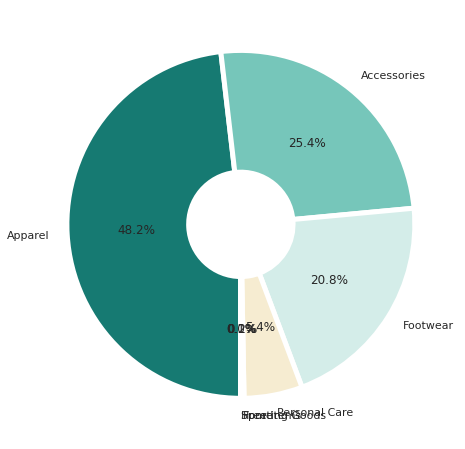

In [ ]:
# 메인 카테고리 비중
plt.figure(figsize=(8,8))
ratio = cat['mainCategory'].value_counts()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio.values, labels=ratio.index, autopct='%.1f%%', startangle=270, counterclock=False,
        wedgeprops=wedgeprops)
plt.show();

- apparel > accessories > footwear 순으로 구입

- 인도네시아가 열대성 기후인 것과 관계가 있을까?

In [ ]:
cat.usage.value_counts()

Casual          980640
Sports          113325
Ethnic           90715
Formal           66338
Smart Casual      1905
Party              855
Travel             760
Home                19
Name: usage, dtype: int64

#추천시스템용 데이터

In [ ]:
rec